<a href="https://colab.research.google.com/github/Bere02/IEBS/blob/main/ML__Caso_Pr%C3%A1tico_Iebs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IEBS - CASO PRÁCTICO MACHINE LEARNING
### BERENICE BACA VARGAS
### Fecha: 02 Junio 2021


#### VERSIÓN DE R

In [ ]:
version[['version.string']]

[1] "R version 4.0.5 (2021-03-31)"

In [ ]:
Sys.time()

[1] "2021-05-31 16:57:44 UTC"

# TAREA #1: ENTENDER EL ENUNCIADO DEL PROBLEMA Y EL CASO PRÁCTICO

<br>
El Ayuntamiento de Madrid ha publicado los datos de 2018 referentes a la flota de taxis de la ciudad, y cuenta con más de 15.000 vehículos. Cada licencia puede tener adscrito un único vehículo para la prestación del servicio. Este conjunto de datos se ofrece en un fichero junto con los datos históricos de la flota de taxi indicando para cada vehículo, su matrícula, marca, modelo, combustible, potencia, número de plazas, etc. El campo Fecha indica la fecha en que se realizó la extracción de la flota mensual. 

Este Ayuntamiento ha solicitado los servicios de Machine Learning a la empresa IA Soluciones, para que construya un algoritmo en R que clasifique medioambientalmente dicha flota según su grado de contaminación. Para simplificar dicho trabajo, la contaminación se medirá a partir del tipo de combustible, y la Fecha de Matriculación (Año).

# TAREA #2: IMPORTAR LIBRERÍAS Y DATASETS

In [ ]:
list.of.packages <- c("dplyr","lubridate","ggplot2","superml","corrplot","RColorBrewer"
                     ,"caTools","kernlab","e1071","rpart","rpart.plot","caret","tree"
                     ,"pROC","ROCR","party","randomForest","caretEnsemble")
new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if (length(new.packages)) install.packages(new.packages)

library(dplyr)          # para usar %>%
library(ggplot2)        # para pintar gráficos
library(lubridate)      # para tratamiento de fechas
library(superml)        # para label encoding
library(corrplot)       # para la matriz de correlación
library(RColorBrewer)   # colorear
library(caTools)        # para split data frames
library(caret)          # Classification And REgression Training
library(caretEnsemble)
library(ROCR)
library(pROC)

library(kernlab)        # Support Vector Machine (SVM)
library(e1071)          # Support Vector Machine (SVM), Random Forest, Naive Bayes

library(rpart)          # Decision Trees
library(rpart.plot)
library(party)
library(tree)

library(randomForest)   # Random Forest

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘TH.data’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘gtools’, ‘libcoin’, ‘matrixStats’, ‘multcomp’, ‘Metrics’, ‘RcppArmadillo’, ‘bitops’, ‘proxy’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘gplots’, ‘mvtnorm’, ‘modeltools’, ‘strucchange’, ‘coin’, ‘zoo’, ‘sandwich’, ‘pbapply’, ‘gridExtra’



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: R6

corrplot 0.88 loaded

Loading required package: lattice


Attaching pack

In [ ]:
options(repr.matrix.max.cols=150
      , repr.matrix.max.rows=200
      , repr.plot.width = 6
      , repr.plot.height = 4)

options(warn=-1)

In [ ]:
rm(list = ls())      # Limpiar la memoria

## CARGA DEL DATASET

In [ ]:
# Datos de la Flota de Taxis de la ciudad de Madrid.
taxiFlota_raw <- read.csv("http://www.diegocalvo.es/wp-content/uploads/2019/11/taxiFlota.csv"
                         , sep = ";"
                         , header = TRUE
                         , strip.white = TRUE
                         , stringsAsFactors = FALSE
                         , fileEncoding = "latin1"
                         , na.strings = "?"
                         ) 

In [ ]:
head(taxiFlota_raw, 5)

,Código,Matrícula,Fecha.Matriculación,Marca,Modelo,Tipo,Variante,Clasificación.medioambiental,Combustible,Cilindrada,Potencia,Número.de.Plazas,Fecha.inicio.de.prestación.del.servicio.de.taxi,Eurotaxi,Régimen.Especial.de.Eurotaxi,Fecha.inicio.Régimen.Especial.Eurotaxi,Fecha.fin.Régimen.Especial.Eurotaxi,Fecha
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1198109,0800GZC,18/10/2010,CHEVROLET,EPICA,KLAL,LV3/134,B,DIESEL,1991,110,5,25/10/2010,NO,NO,,,30/07/2018
2,1196804,7686GYS,23/09/2010,CHEVROLET,EPICA,KLAL,LV1/111,C,GASOLINA TRANSFORMADO GLP,1993,105,5,04/10/2010,NO,NO,,,30/07/2018
3,1182347,5440GTD,02/02/2010,CHEVROLET,EPICA,KLAL,LV3/134,B,DIESEL,1991,110,5,04/02/2010,NO,NO,,,30/07/2018
4,1189908,3259GWN,21/05/2010,CHEVROLET,EPICA,KLAL,LV3/134,B,DIESEL,1991,110,5,24/05/2010,NO,NO,,,30/07/2018
5,1180158,9107GSN,29/12/2009,CHEVROLET,EPICA,KLAL,LV3/134,B,DIESEL,1991,110,5,04/01/2010,NO,NO,,,30/07/2018


In [ ]:
colnames(taxiFlota_raw)

[1] "Código"                                         
 [2] "Matrícula"                                      
 [3] "Fecha.Matriculación"                            
 [4] "Marca"                                          
 [5] "Modelo"                                         
 [6] "Tipo"                                           
 [7] "Variante"                                       
 [8] "Clasificación.medioambiental"                   
 [9] "Combustible"                                    
[10] "Cilindrada"                                     
[11] "Potencia"                                       
[12] "Número.de.Plazas"                               
[13] "Fecha.inicio.de.prestación.del.servicio.de.taxi"
[14] "Eurotaxi"                                       
[15] "Régimen.Especial.de.Eurotaxi"                   
[16] "Fecha.inicio.Régimen.Especial.Eurotaxi"         
[17] "Fecha.fin.Régimen.Especial.Eurotaxi"            
[18] "Fecha"

Vamos a renombrar las columnas

Asignar a las fechas los datos corerectos a las columnas 

Revisar nuestro como queda nuestro Data Frame

In [ ]:
colnames(taxiFlota_raw)[colnames(taxiFlota_raw) == "Código"] <- "Codigo"
colnames(taxiFlota_raw)[colnames(taxiFlota_raw) == "Matrícula"] <- "Matricula"
colnames(taxiFlota_raw)[colnames(taxiFlota_raw) == "Fecha.Matriculación"] <- "FechaMatriculacion"
colnames(taxiFlota_raw)[colnames(taxiFlota_raw) == "Clasificación.medioambiental"] <- "Clasificacion"
colnames(taxiFlota_raw)[colnames(taxiFlota_raw) == "Número.de.Plazas"] <- "NumPlazas"
colnames(taxiFlota_raw)[colnames(taxiFlota_raw) == "Fecha.inicio.de.prestación.del.servicio.de.taxi"] <- "FechaIniServicio"
colnames(taxiFlota_raw)[colnames(taxiFlota_raw) == "Régimen.Especial.de.Eurotaxi"] <- "RegEspecial_Eurotaxi"
colnames(taxiFlota_raw)[colnames(taxiFlota_raw) == "Fecha.inicio.Régimen.Especial.Eurotaxi"] <- "FechaIni_Eurotaxi"
colnames(taxiFlota_raw)[colnames(taxiFlota_raw) == "Fecha.fin.Régimen.Especial.Eurotaxi"] <- "FechaFin_Eurotaxi"

In [ ]:
taxiFlota_raw$'FechaMatriculacion' <- as.Date(taxiFlota_raw$'FechaMatriculacion', format="%d/%m/%Y")
taxiFlota_raw$'FechaIniServicio' <- as.Date(taxiFlota_raw$'FechaIniServicio', format="%d/%m/%Y")
taxiFlota_raw$'FechaIni_Eurotaxi' <- as.Date(taxiFlota_raw$'FechaIni_Eurotaxi', format="%d/%m/%Y")
taxiFlota_raw$'FechaFin_Eurotaxi' <- as.Date(taxiFlota_raw$'FechaFin_Eurotaxi', format="%d/%m/%Y")
taxiFlota_raw$'Fecha' <- as.Date(taxiFlota_raw$'Fecha', format="%d/%m/%Y")

In [ ]:
str(taxiFlota_raw)

'data.frame':	46918 obs. of  18 variables:
 $ Codigo              : int  1198109 1196804 1182347 1189908 1180158 1194793 1181262 1385946 1508730 1426824 ...
 $ Matricula           : chr  "0800GZC" "7686GYS" "5440GTD" "3259GWN" ...
 $ FechaMatriculacion  : Date, format: "2010-10-18" "2010-09-23" ...
 $ Marca               : chr  "CHEVROLET" "CHEVROLET" "CHEVROLET" "CHEVROLET" ...
 $ Modelo              : chr  "EPICA" "EPICA" "EPICA" "EPICA" ...
 $ Tipo                : chr  "KLAL" "KLAL" "KLAL" "KLAL" ...
 $ Variante            : chr  "LV3/134" "LV1/111" "LV3/134" "LV3/134" ...
 $ Clasificacion       : chr  "B" "C" "B" "B" ...
 $ Combustible         : chr  "DIESEL" "GASOLINA TRANSFORMADO GLP" "DIESEL" "DIESEL" ...
 $ Cilindrada          : int  1991 1993 1991 1991 1991 1991 1991 1560 1587 1560 ...
 $ Potencia            : num  110 105 110 110 110 110 110 88 85 73 ...
 $ NumPlazas           : chr  "5" "5" "5" "5" ...
 $ FechaIniServicio    : Date, format: "2010-10-25" "2010-10-04" ...
 $ 

Quitamos los NAs si existen y le damos un valor 

In [ ]:
sapply(taxiFlota_raw, function(x) sum(is.na(x)))

Codigo            Matricula   FechaMatriculacion 
                   0                    0                    0 
               Marca               Modelo                 Tipo 
                   0                    0                    0 
            Variante        Clasificacion          Combustible 
                   0                    0                    0 
          Cilindrada             Potencia            NumPlazas 
                   0                    5                    0 
    FechaIniServicio             Eurotaxi RegEspecial_Eurotaxi 
                   0                    0                    0 
   FechaIni_Eurotaxi    FechaFin_Eurotaxi                Fecha 
               45377                45377                    0

In [ ]:
taxiFlota_raw$Potencia[is.na(taxiFlota_raw$Potencia)] <- 0

In [ ]:
head(taxiFlota_raw, 1)

,Codigo,Matricula,FechaMatriculacion,Marca,Modelo,Tipo,Variante,Clasificacion,Combustible,Cilindrada,Potencia,NumPlazas,FechaIniServicio,Eurotaxi,RegEspecial_Eurotaxi,FechaIni_Eurotaxi,FechaFin_Eurotaxi,Fecha
,<int>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<date>,<chr>,<chr>,<date>,<date>,<date>
1,1198109,0800GZC,2010-10-18,CHEVROLET,EPICA,KLAL,LV3/134,B,DIESEL,1991,110,5,2010-10-25,NO,NO,NA,NA,2018-07-30


In [ ]:
sort(unique(taxiFlota_raw$Marca))

[1] "CHEVROLET"     "CITROEN"       "DACIA"         "FIAT"         
 [5] "FORD"          "HYUNDAI"       "LEXUS"         "MERCEDES-BENZ"
 [9] "NISSAN"        "PEUGEOT"       "RENAULT"       "SEAT"         
[13] "SKODA"         "SSANGYONG"     "TESLA"         "TOYOTA"       
[17] "VOLKSWAGEN"

In [ ]:
sort(unique(taxiFlota_raw$Clasificacion))

[1] "0"   "B"   "C"   "ECO"

In [ ]:
sort(unique(taxiFlota_raw$Combustible))

[1] "DIESEL"                    "ELECTRICO"                
[3] "GASOLINA"                  "GASOLINA - GAS NATURAL"   
[5] "GASOLINA TRANSFORMADO GLP" "GASOLINA-ELECTRICIDAD"    
[7] "GLP / GASOLINA"

In [ ]:
taxiFlota_raw$Cilindrada <- round(taxiFlota_raw$Cilindrada / 1000, 1)

In [ ]:
sort(unique(taxiFlota_raw$Cilindrada))

[1] 0.0 0.9 1.2 1.4 1.5 1.6 1.8 1.9 2.0 2.1 2.5 3.0 3.5

In [ ]:
unique(taxiFlota_raw$NumPlazas)

[1] "5"                        "7"                       
 [3] "5 + 1 PMR"                "5+1PMR"                  
 [5] "de 6+1PMR a 9 plazas (*)" "9"                       
 [7] "6"                        "de 5+1PMR a 9 plazas (*)"
 [9] "5+2PMR"                   "7+1PMR"                  
[11] "8"                        "de 5+1PMR a 8 plazas (*)"
[13] "de 5+1PMR a 7 plazas (*)" "de 6+1PMR a 8 plazas (*)"

Creamos la columna
 <b>PMR</b>

In [ ]:
# Plazas para Personas con Movilidad Reducida (PMR)
taxiFlota_raw$PMR[taxiFlota_raw$NumPlazas == "5 + 1 PMR"] <- "1"
taxiFlota_raw$PMR[taxiFlota_raw$NumPlazas == "5+1PMR"] <- "1"
taxiFlota_raw$PMR[taxiFlota_raw$NumPlazas == "de 6+1PMR a 9 plazas (*)"] <- "1"
taxiFlota_raw$PMR[taxiFlota_raw$NumPlazas == "de 5+1PMR a 9 plazas (*)"] <- "1"
taxiFlota_raw$PMR[taxiFlota_raw$NumPlazas == "5+2PMR"] <- "2"
taxiFlota_raw$PMR[taxiFlota_raw$NumPlazas == "7+1PMR"] <- "1"
taxiFlota_raw$PMR[taxiFlota_raw$NumPlazas == "de 5+1PMR a 8 plazas (*)"] <- "1"
taxiFlota_raw$PMR[taxiFlota_raw$NumPlazas == "de 5+1PMR a 7 plazas (*)"] <- "1"
taxiFlota_raw$PMR[taxiFlota_raw$NumPlazas == "de 6+1PMR a 8 plazas (*)"] <- "1"
taxiFlota_raw$PMR[is.na(taxiFlota_raw$PMR)] <- "0"

In [ ]:
taxiFlota_raw$NumPlazas[taxiFlota_raw$NumPlazas == "5 + 1 PMR"] <- "5"
taxiFlota_raw$NumPlazas[taxiFlota_raw$NumPlazas == "5+1PMR"] <- "5"
taxiFlota_raw$NumPlazas[taxiFlota_raw$NumPlazas == "de 6+1PMR a 9 plazas (*)"] <- "9"
taxiFlota_raw$NumPlazas[taxiFlota_raw$NumPlazas == "de 5+1PMR a 9 plazas (*)"] <- "9"
taxiFlota_raw$NumPlazas[taxiFlota_raw$NumPlazas == "5+2PMR"] <- "5"
taxiFlota_raw$NumPlazas[taxiFlota_raw$NumPlazas == "7+1PMR"] <- "7"
taxiFlota_raw$NumPlazas[taxiFlota_raw$NumPlazas == "de 5+1PMR a 8 plazas (*)"] <- "8"
taxiFlota_raw$NumPlazas[taxiFlota_raw$NumPlazas == "de 5+1PMR a 7 plazas (*)"] <- "7"
taxiFlota_raw$NumPlazas[taxiFlota_raw$NumPlazas == "de 6+1PMR a 8 plazas (*)"] <- "8"
taxiFlota_raw$NumPlazas[is.na(taxiFlota_raw$NumPlazas)] <- "0"

In [ ]:
taxiFlota_raw$NumPlazas <- as.numeric(taxiFlota_raw$NumPlazas)
taxiFlota_raw$PMR <- as.numeric(taxiFlota_raw$PMR)

In [ ]:
unique(taxiFlota_raw$NumPlazas)

[1] 5 7 9 6 8

In [ ]:
unique(taxiFlota_raw$PMR)

[1] 0 1 2

## TAREA #3. HACER LA LIMPIEZA DE LOS DATOS

In [ ]:
unique(taxiFlota_raw$Fecha)

[1] "2018-07-30" "2018-08-30" "2018-09-29"

In [ ]:
head(taxiFlota_raw %>% group_by(Matricula) %>% summarise(Conteo = n()), 5)

Matricula,Conteo
<chr>,<int>
0000HDY,3
0000HTS,3
0000JYG,3
0001HFW,3
0002JVL,3


In [ ]:
with(taxiFlota_raw, taxiFlota_raw[ (Matricula=="0001HFW"), ])

,Codigo,Matricula,FechaMatriculacion,Marca,Modelo,Tipo,Variante,Clasificacion,Combustible,Cilindrada,Potencia,NumPlazas,FechaIniServicio,Eurotaxi,RegEspecial_Eurotaxi,FechaIni_Eurotaxi,FechaFin_Eurotaxi,Fecha,PMR
,<int>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<date>,<chr>,<chr>,<date>,<date>,<date>,<dbl>
10626,1229223,0001HFW,2011-08-04,SKODA,OCTAVIA,1Z,AACAYCX01/NFM5***,B,DIESEL,1.6,77,5,2011-08-05,NO,NO,NA,NA,2018-07-30,0
26223,1229223,0001HFW,2011-08-04,SKODA,OCTAVIA,1Z,AACAYCX01/NFM5***,B,DIESEL,1.6,77,5,2011-08-05,NO,NO,NA,NA,2018-08-30,0
41837,1229223,0001HFW,2011-08-04,SKODA,OCTAVIA,1Z,AACAYCX01/NFM5***,B,DIESEL,1.6,77,5,2011-08-05,NO,NO,NA,NA,2018-09-29,0


Como encontramos registros duplicados tenemos que limpiar para quedarnos con un solo registro por vehículo y la última fecha de carga<br>


In [ ]:
MaxFecha_Matricula <- taxiFlota_raw %>%
                          group_by(Matricula) %>% 
                          summarise(Fecha = max(Fecha))

In [ ]:
taxiFlota <- merge(x=taxiFlota_raw, y=MaxFecha_Matricula, by=c('Matricula','Fecha'))

In [ ]:
print(paste("ANTES:", NROW(taxiFlota_raw)
            , "registros >>> AHORA:", NROW(taxiFlota), "registros"
            , ">>> DIFERENCIA:", NROW(taxiFlota_raw) - NROW(taxiFlota)
            , sep=" "))

[1] "ANTES: 46918 registros >>> AHORA: 15969 registros >>> DIFERENCIA: 30949"


In [ ]:
NROW(sort(unique(taxiFlota$Matricula))) 

[1] 15969

In [ ]:
summary(taxiFlota)

  Matricula             Fecha                Codigo        FechaMatriculacion  
 Length:15969       Min.   :2018-07-30   Min.   : 550160   Min.   :2007-01-08  
 Class :character   1st Qu.:2018-09-29   1st Qu.:1288146   1st Qu.:2012-12-20  
 Mode  :character   Median :2018-09-29   Median :1351988   Median :2014-10-21  
                    Mean   :2018-09-28   Mean   :1357436   Mean   :2014-09-09  
                    3rd Qu.:2018-09-29   3rd Qu.:1440012   3rd Qu.:2016-09-29  
                    Max.   :2018-09-29   Max.   :1524506   Max.   :2018-09-26  
                                                                               
    Marca              Modelo              Tipo             Variante        
 Length:15969       Length:15969       Length:15969       Length:15969      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                    

In [ ]:
taxiFlota %>%
  group_by(Fecha) %>% 
  summarise(N_Taxis = n())

Fecha,N_Taxis
<date>,<int>
2018-07-30,139
2018-08-30,190
2018-09-29,15640


Dejamos solo los taxis que se cargaron a partir de la máxima fecha, que es Septiembre

In [ ]:
# Última fecha de carga
max_Fecha <- max(taxiFlota$Fecha)

taxiFlota <- with(taxiFlota, taxiFlota[ (Fecha == max_Fecha), ])

# TAREA #4: VISUALIZAR EL DATASET

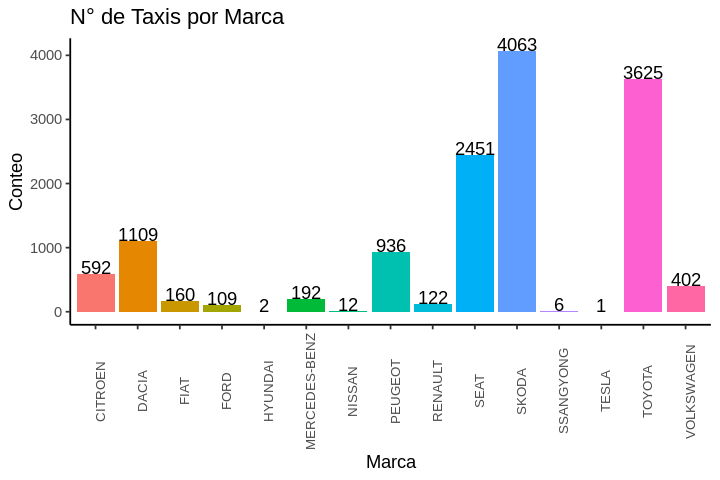

In [ ]:
taxiFlota %>%
  group_by(Marca) %>% 
  summarise(N_Taxis = n()) %>% 
  ggplot(aes(x=Marca, y=N_Taxis)) + 
  geom_bar(stat = "identity", aes(fill = Marca), position='dodge') +
  geom_text(aes(label=N_Taxis), vjust=0) +
  theme_classic() +
  labs(title = "N° de Taxis por Marca",
       x = "Marca", 
       y = "Conteo") +
  theme(axis.text.x = element_text(angle = 90, hjust = 0.5, size=8)) +
  labs(fill = "Marca") +
  theme(legend.position = "none")

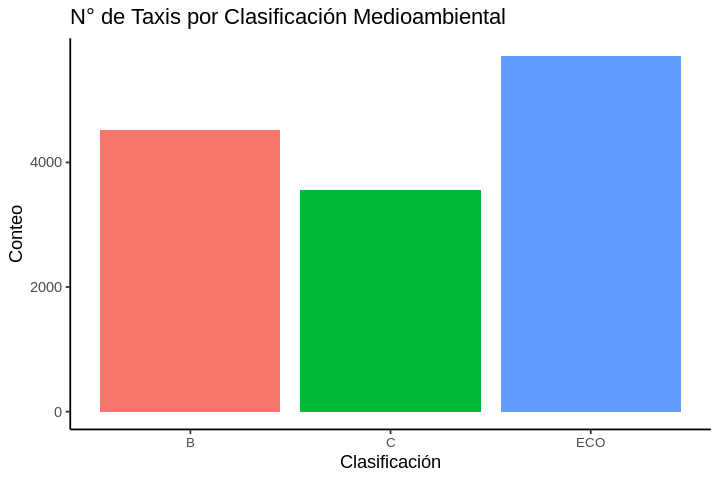

In [ ]:
taxiFlota %>%
  group_by(Clasificacion) %>% 
  summarise(N_Taxis = n()) %>%
  ggplot(aes(x=Clasificacion, y=N_Taxis)) + 
  geom_bar(stat = "identity", aes(fill = Clasificacion)) +
  theme_classic() +
  labs(title = "N° de Taxis por Clasificación Medioambiental",
       x = "Clasificación", 
       y = "Conteo") +
  theme(axis.text.x = element_text(angle = 0, hjust = 0.5, size=8)) +
  labs(fill = "Clasificación")  +
  theme(legend.position = "none")

In [ ]:
taxiFlota %>% 
    group_by(Clasificacion, Combustible) %>% 
    summarise(N_Taxis = n()) %>% 
    arrange(Clasificacion, desc(N_Taxis))

`summarise()` has grouped output by 'Clasificacion'. You can override using the `.groups` argument.



Clasificacion,Combustible,N_Taxis
<chr>,<chr>,<int>
B,DIESEL,4519
C,DIESEL,3537
C,GASOLINA TRANSFORMADO GLP,12
C,GASOLINA,6
ECO,GASOLINA-ELECTRICIDAD,3625
ECO,GLP / GASOLINA,1981
ECO,GASOLINA - GAS NATURAL,89
ECO,ELECTRICO,13


In [ ]:
taxiFlota$Clasificacion[(taxiFlota$Clasificacion == "0") & (taxiFlota$Combustible == "ELECTRICO")] <- "ECO"

In [ ]:
head(with(taxiFlota, taxiFlota[ (Clasificacion == "0"), ]), 5)

Marca,Year,Combustible,Modelo,Clasificacion,Cilindrada,Potencia,NumPlazas,Eurotaxi,PMR,Antiguedad,Antiguedad_Eurotaxi,Weight,Emissions
<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>


In [ ]:
taxiFlota <- with(taxiFlota, taxiFlota[ (Clasificacion != "0"), ])

Visualizamos el data frame

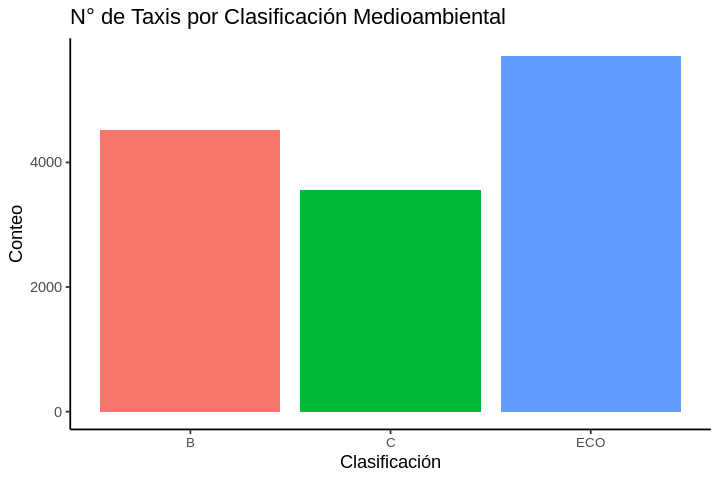

In [ ]:
taxiFlota %>%
  group_by(Clasificacion) %>% 
  summarise(N_Taxis = n()) %>%
  ggplot(aes(x=Clasificacion, y=N_Taxis)) + 
  geom_bar(stat = "identity", aes(fill = Clasificacion)) +
  theme_classic() +
  labs(title = "N° de Taxis por Clasificación Medioambiental",
       x = "Clasificación", 
       y = "Conteo") +
  theme(axis.text.x = element_text(angle = 0, hjust = 0.5, size=8)) +
  labs(fill = "Clasificación")  +
  theme(legend.position = "none")

In [ ]:
taxiFlota %>% 
    group_by(Marca, Clasificacion) %>% 
    summarise(N_Taxis = n()) %>% 
    arrange(Marca, Clasificacion)

`summarise()` has grouped output by 'Marca'. You can override using the `.groups` argument.



Marca,Clasificacion,N_Taxis
<chr>,<chr>,<int>
CHEVROLET,B,5
CHEVROLET,C,1
CITROEN,B,45
CITROEN,C,294
CITROEN,ECO,370
DACIA,C,281
DACIA,ECO,964
FIAT,B,10
FIAT,C,43


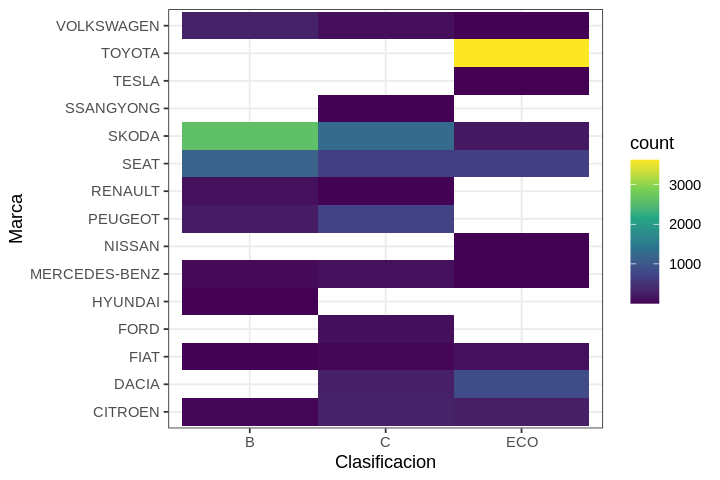

In [ ]:
ggplot(taxiFlota, aes(x=Clasificacion, y=Marca) ) +
  geom_bin2d(bins = 7) +
  scale_fill_continuous(type = "viridis") +
  theme_bw()

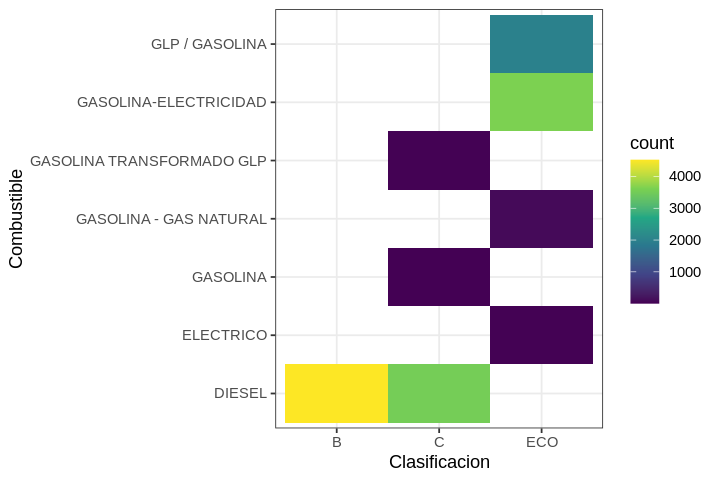

In [ ]:
ggplot(taxiFlota, aes(x=Clasificacion, y=Combustible) ) +
  geom_bin2d(bins = 7) +
  scale_fill_continuous(type = "viridis") +
  theme_bw()

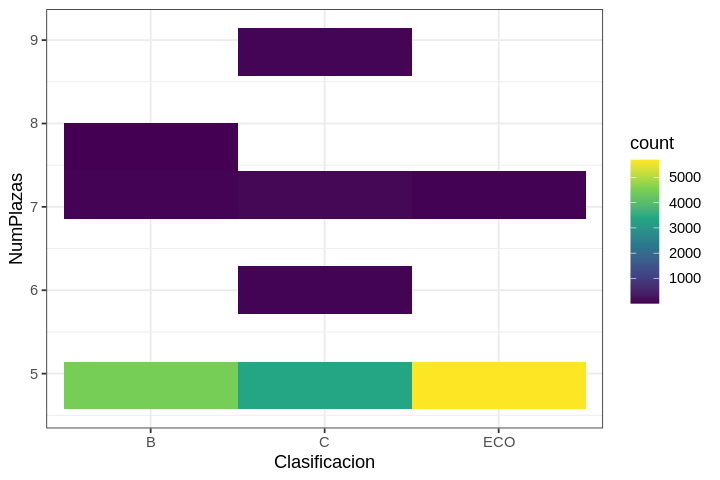

In [ ]:
ggplot(taxiFlota, aes(x=Clasificacion, y=NumPlazas) ) +
  geom_bin2d(bins = 7) +
  scale_fill_continuous(type = "viridis") +
  theme_bw()

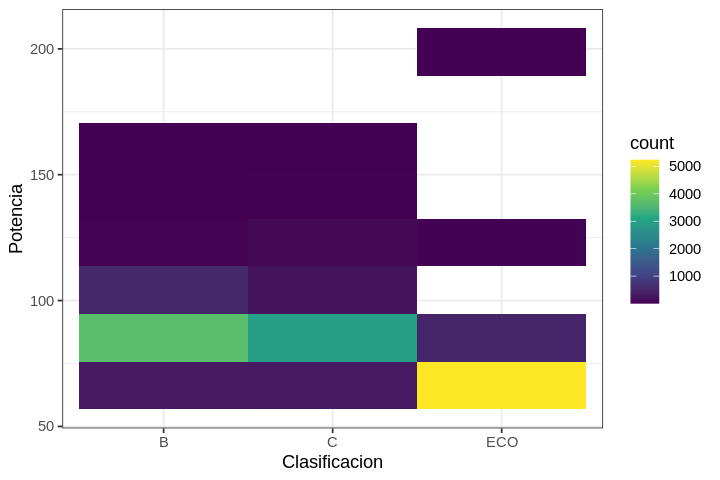

In [ ]:
ggplot(taxiFlota, aes(x=Clasificacion, y=Potencia) ) +
  geom_bin2d(bins = 7) +
  scale_fill_continuous(type = "viridis") +
  theme_bw()

In [ ]:
head(with(taxiFlota, taxiFlota[ (Potencia==0), ]), 5)

,Matricula,Fecha,Codigo,FechaMatriculacion,Marca,Modelo,Tipo,Variante,Clasificacion,Combustible,Cilindrada,Potencia,NumPlazas,FechaIniServicio,Eurotaxi,RegEspecial_Eurotaxi,FechaIni_Eurotaxi,FechaFin_Eurotaxi,PMR
,<chr>,<date>,<int>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<date>,<chr>,<chr>,<date>,<date>,<dbl>
932,0539JBC,2018-09-29,1350711,2009-05-12,MERCEDES-BENZ,E 200 CDI,211,U00LL0,B,DIESEL,0,0,5,2014-11-14,NO,NO,NA,NA,0
3086,1872GJD,2018-09-29,1350832,2008-10-23,MERCEDES-BENZ,E 200 CDI,211,U00LL0,B,DIESEL,0,0,5,2014-11-17,NO,NO,NA,NA,0
3175,1933GMF,2018-09-29,1150331,2009-05-08,MERCEDES-BENZ,E 200 CDI,211,U00LL0,B,DIESEL,0,0,5,2009-05-12,NO,NO,NA,NA,0
11180,6979GKH,2018-09-29,1125223,2009-01-02,MERCEDES-BENZ,E 220 CDI,211,U00ML0,B,DIESEL,0,0,5,2009-01-07,NO,NO,NA,NA,0
11305,7061KMR,2018-09-29,1515949,2018-07-09,NISSAN,NISSAN LEAF 40 KWH,ZE1,A,ECO,ELECTRICO,0,0,5,2018-07-11,NO,NO,NA,NA,0


Calculamos la potencia media por Marca y Combustible, para sustituir a los que tienen potencia 0

In [ ]:
Potencia_Media <- taxiFlota %>%
                      group_by(Marca, Combustible) %>% 
                      summarise(AVG_Potencia = mean(Potencia, na.rm = TRUE))

Potencia_Media <- data.frame(Potencia_Media)

Potencia_Media$AVG_Potencia <- round(Potencia_Media$AVG_Potencia, 0)

`summarise()` has grouped output by 'Marca'. You can override using the `.groups` argument.



In [ ]:
taxiFlota <- merge(x=taxiFlota, y=Potencia_Media, by=c('Marca','Combustible'))

In [ ]:
taxiFlota$Potencia[taxiFlota$Potencia == 0] <- taxiFlota$AVG_Potencia

In [ ]:

taxiFlota <- subset(taxiFlota, select = -AVG_Potencia)

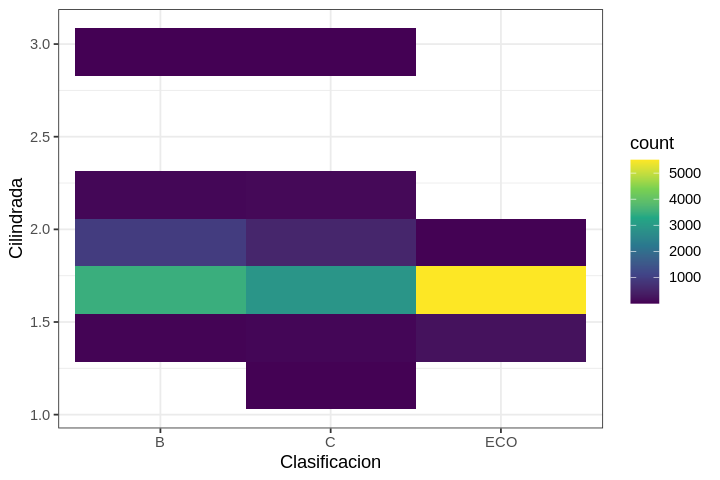

In [ ]:
ggplot(taxiFlota, aes(x=Clasificacion, y=Cilindrada) ) +
  geom_bin2d(bins = 7) +
  scale_fill_continuous(type = "viridis") +
  theme_bw()

In [ ]:
head(with(taxiFlota, taxiFlota[ (Cilindrada==0), ]), 5)

,Marca,Combustible,Matricula,Fecha,Codigo,FechaMatriculacion,Modelo,Tipo,Variante,Clasificacion,Cilindrada,Potencia,NumPlazas,FechaIniServicio,Eurotaxi,RegEspecial_Eurotaxi,FechaIni_Eurotaxi,FechaFin_Eurotaxi,PMR
,<chr>,<chr>,<chr>,<date>,<int>,<date>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<date>,<chr>,<chr>,<date>,<date>,<dbl>
2646,MERCEDES-BENZ,DIESEL,7989GKN,2018-09-29,1142004,2009-01-26,E 220 CDI,211,U00ML0,B,0,110,5,2009-01-27,NO,NO,NA,NA,0
2659,MERCEDES-BENZ,DIESEL,0539JBC,2018-09-29,1350711,2009-05-12,E 200 CDI,211,U00LL0,B,0,110,5,2014-11-14,NO,NO,NA,NA,0
2675,MERCEDES-BENZ,DIESEL,6979GKH,2018-09-29,1125223,2009-01-02,E 220 CDI,211,U00ML0,B,0,110,5,2009-01-07,NO,NO,NA,NA,0
2678,MERCEDES-BENZ,DIESEL,8189GKH,2018-09-29,1141559,2009-01-02,E 220 CDI,211,U00ML0,B,0,110,5,2009-01-19,NO,NO,NA,NA,0
2727,MERCEDES-BENZ,DIESEL,9275GLC,2018-09-29,1144495,2009-03-02,E 200 CDI,211 K,U20LL0,B,0,110,5,2009-03-06,NO,NO,NA,NA,0


Calculamos la cilindrada media por Marca y Combustible para eliminar los campos con 0

In [ ]:
Cilindrada_Media <- taxiFlota %>%
                      group_by(Marca, Combustible) %>% 
                      summarise(AVG_Cilindrada = mean(Cilindrada, na.rm = TRUE))

Cilindrada_Media <- data.frame(Cilindrada_Media)

Cilindrada_Media$AVG_Cilindrada <- round(Cilindrada_Media$AVG_Cilindrada, 1)

`summarise()` has grouped output by 'Marca'. You can override using the `.groups` argument.



In [ ]:
taxiFlota <- merge(x=taxiFlota, y=Cilindrada_Media, by=c('Marca','Combustible'))

In [ ]:
taxiFlota$Cilindrada[taxiFlota$Cilindrada == 0] <- taxiFlota$AVG_Cilindrada

In [ ]:

taxiFlota <- subset(taxiFlota, select = -AVG_Cilindrada)

In [ ]:
taxiFlota$Modelo   <- gsub('\\*', '', taxiFlota$Modelo)
taxiFlota$Tipo     <- gsub('\\*', '', taxiFlota$Tipo)
taxiFlota$Variante <- gsub('\\*', '', taxiFlota$Variante)
taxiFlota$Variante <- gsub('\\?', '', taxiFlota$Variante)

In [ ]:
sort(unique(taxiFlota$Modelo))

[1] "407"                "407 SW"             "5008"              
 [4] "ALHAMBRA"           "ALTEA XL"           "C-ELYSEE"          
 [7] "C-ELYSEE eco-glv"   "C4 PICASSO"         "C8"                
[10] "CADDY"              "CADDY BLUEMOTION"   "CARAVELLE"         
[13] "CUSTOM"             "DOBLO"              "E 200 "            
[16] "E 200 BLUETEC"      "E 200 CDI"          "E 200 D"           
[19] "E 220 BLUETEC"      "E 220 CDI"          "E 220 D"           
[22] "E 250 CDI"          "E 300 BLUETEC"      "E 300 CDI"         
[25] "GC4 PICASSO"        "GOLF"               "JETTA"             
[28] "JUMPY"              "KANGOO TPMR"        "LAGUNA"            
[31] "LEAF"               "LEON ST"            "LODGY"             
[34] "MEGANE GR. SCENIC"  "MODEL S"            "OCTAVIA"           
[37] "PASSAT"             "PRIUS"              "PRIUS PLUS"        
[40] "RAPID"              "SONATA F/L"         "SUPERB"            
[43] "SUPERB GREEN LINE"  "TALENTO"            "TIPO"              
[46] "TOLEDO"             "TOLEDO E-ECOMOTIVE" "TOURNEO CONNECT"   
[49] "TRAFIC"             "TRANSIT CONNECT"    "V 220"             
[52] "VIANO"              "XLV"

In [ ]:
taxiFlota$Modelo <- gsub('CITROEN ', '', taxiFlota$Modelo)
taxiFlota$Modelo <- gsub('NATURAL GAS', '', taxiFlota$Modelo)
taxiFlota$Modelo <- gsub(' berlina', '', taxiFlota$Modelo)
taxiFlota$Modelo <- gsub('FIAT ', '', taxiFlota$Modelo)
taxiFlota$Modelo <- gsub('FORD ', '', taxiFlota$Modelo)
taxiFlota$Modelo <- gsub('NISSAN ', '', taxiFlota$Modelo)
taxiFlota$Modelo <- gsub('RENAULT ', '', taxiFlota$Modelo)
taxiFlota$Modelo <- gsub('SKODA ', '', taxiFlota$Modelo)
taxiFlota$Modelo <- gsub(' 30 kW', '', taxiFlota$Modelo)
taxiFlota$Modelo <- gsub(' 40 KWH', '', taxiFlota$Modelo)
taxiFlota$Modelo <- gsub(' 1,9 TDI 5v man \\(2005\\)', '', taxiFlota$Modelo)
taxiFlota$Modelo <- gsub(' man \\(2005\\)', '', taxiFlota$Modelo)
taxiFlota$Modelo <- gsub(' 1,9 TDI 5v', '', taxiFlota$Modelo)
taxiFlota$Modelo <- gsub(' o. CA', '', taxiFlota$Modelo)
taxiFlota$Modelo <- gsub('E200', 'E 200', taxiFlota$Modelo)
taxiFlota$Modelo <- gsub('200d', '200 D', taxiFlota$Modelo)
taxiFlota$Modelo <- gsub('E220', 'E 220', taxiFlota$Modelo)
taxiFlota$Modelo <- gsub('220d', '220 D', taxiFlota$Modelo)
taxiFlota$Modelo <- gsub('508', '5008', taxiFlota$Modelo)
taxiFlota$Modelo <- gsub('CLASE ', '', taxiFlota$Modelo)
taxiFlota$Modelo <- gsub('V220', 'V 220', taxiFlota$Modelo)

In [ ]:
sort(unique(taxiFlota$Modelo))

[1] "3.5"                "407"                "407 SW"            
 [4] "5008"               "ALHAMBRA"           "ALTEA XL"          
 [7] "C-ELYSEE"           "C-ELYSEE eco-glv"   "C4 PICASSO"        
[10] "C8"                 "CADDY"              "CADDY BLUEMOTION"  
[13] "CARAVELLE"          "CUSTOM"             "DOBLO"             
[16] "E 200 "             "E 200 BLUETEC"      "E 200 CDI"         
[19] "E 200 D"            "E 220 BLUETEC"      "E 220 CDI"         
[22] "E 220 D"            "E 250 CDI"          "E 300 BLUETEC"     
[25] "E 300 CDI"          "EPICA"              "GC4 PICASSO"       
[28] "GOLF"               "IS300h"             "JETTA"             
[31] "JUMPY"              "KANGOO TPMR"        "LAGUNA"            
[34] "LEAF"               "LEON ST"            "LODGY"             
[37] "LOGAN MCV"          "MEGANE GR. SCENIC"  "MODEL S"           
[40] "MONDEO HIBRIDO"     "OCTAVIA"            "PASSAT"            
[43] "PRIUS"              "PRIUS PLUS"         "RAPID"             
[46] "SONATA F/L"         "SUPERB"             "SUPERB GREEN LINE" 
[49] "TALENTO"            "TIPO"               "TOLEDO"            
[52] "TOLEDO E-ECOMOTIVE" "TOURNEO CONNECT"    "TRAFIC"            
[55] "TRANSIT CONNECT"    "TRANSPORTER"        "ULYSSE"            
[58] "V 220"              "VIANO"              "VITO TOURER"       
[61] "XLV"

Creamos columna <b>Antigüedad</b> para colocar los años en que comenzo el servicio a la fecha actual


In [ ]:
taxiFlota$Antiguedad <- interval(start= taxiFlota$FechaIniServicio, end=today()) / duration(n=1, unit="years")
taxiFlota$Antiguedad <- floor(taxiFlota$Antiguedad)
taxiFlota$Antiguedad[is.na(taxiFlota$Antiguedad)] <- 0

In [ ]:
taxiFlota$FechaFin_Eurotaxi[(!is.na(taxiFlota$FechaIni_Eurotaxi)) & (is.na(taxiFlota$FechaFin_Eurotaxi))] <- today()

In [ ]:
taxiFlota$Antiguedad_Eurotaxi <- interval(start= taxiFlota$FechaIni_Eurotaxi, end=taxiFlota$FechaFin_Eurotaxi) / duration(n=1, unit="years")
taxiFlota$Antiguedad_Eurotaxi <- floor(taxiFlota$Antiguedad_Eurotaxi)

In [ ]:
taxiFlota$Antiguedad_Eurotaxi[is.na(taxiFlota$Antiguedad_Eurotaxi)] <- 0

In [ ]:
taxiFlota$PMR <- ifelse(taxiFlota$PMR > 0, 'SI', 'NO')

In [ ]:
taxiFlota$Year <- as.numeric(format(taxiFlota$FechaMatricula, format="%Y"))

### CARGAMOS DATASETS DE PESO Y EMISIONES DE CO2


Los datos los he obtenido de la European Environment Agency.<br>
https://www.eea.europa.eu/data-and-maps/daviz/cars-co2-emissions-trends-by-manufacturer#tab-chart_2

In [ ]:
CO2_1 <- read.csv("https://www.eea.europa.eu/data-and-maps/daviz/cars-co2-emissions-trends-by-manufacturer/download.csv"
                         , sep = ","
                         , header=TRUE
                         , strip.white = TRUE
                         , stringsAsFactors = FALSE
                         , fileEncoding = "latin1"
                         , na.strings = "?"
                         ) 

In [ ]:
CO2_2 <- read.csv("https://www.eea.europa.eu/data-and-maps/daviz/cars-co2-emissions-trends-by-manufacturer-2/download.csv"
                         , sep = ","
                         , header=TRUE
                         , strip.white = TRUE
                         , stringsAsFactors = FALSE
                         , fileEncoding = "latin1"
                         , na.strings = "?"
                         ) 

In [ ]:
CO2_3 <- read.csv("https://www.eea.europa.eu/data-and-maps/daviz/cars-co2-emissions-trends-by-manufacturer-3/download.csv"
                         , sep = ","
                         , header=TRUE
                         , strip.white = TRUE
                         , stringsAsFactors = FALSE
                         , fileEncoding = "latin1"
                         , na.strings = "?"
                         ) 

In [ ]:
CO2_4 <- read.csv("https://www.eea.europa.eu/data-and-maps/daviz/cars-co2-emissions-trends-by-manufacturer-4/download.csv"
                         , sep = ","
                         , header=TRUE
                         , strip.white = TRUE
                         , stringsAsFactors = FALSE
                         , fileEncoding = "latin1"
                         , na.strings = "?"
                         ) 

In [ ]:
CO2_5 <- read.csv("https://www.eea.europa.eu/data-and-maps/daviz/cars-co2-emissions-trends-by-manufacturer-5/download.csv"
                         , sep = ","
                         , header=TRUE
                         , strip.white = TRUE
                         , stringsAsFactors = FALSE
                         , fileEncoding = "latin1"
                         , na.strings = "?"
                         ) 

In [ ]:
names(CO2_1)[names(CO2_1) == "Manufacturer..short.name..text"] <- "Manufacturer_short"
names(CO2_1)[names(CO2_1) == "Manufacturer.text"] <- "Manufacturer"
names(CO2_1)[names(CO2_1) == "Year.year"] <- "Year"
names(CO2_1)[names(CO2_1) == "Number.of.registered.vehicles.number"] <- "Registered_Vehicles"
names(CO2_1)[names(CO2_1) == "Average.mass..Kg..number"] <- "Weight"
names(CO2_1)[names(CO2_1) == "Average.CO2.emissions..g.Km..number"] <- "Emissions"

In [ ]:
names(CO2_2)[names(CO2_2) == "Manufacturer..short.name..text"] <- "Manufacturer_short"
names(CO2_2)[names(CO2_2) == "Manufacturer.text"] <- "Manufacturer"
names(CO2_2)[names(CO2_2) == "Year.year"] <- "Year"
names(CO2_2)[names(CO2_2) == "registration.number"] <- "Registered_Vehicles"
names(CO2_2)[names(CO2_2) == "Average.mass..Kg..number"] <- "Weight"
names(CO2_2)[names(CO2_2) == "Average.CO2.emissions..g.Km..number"] <- "Emissions"

In [ ]:
names(CO2_3)[names(CO2_3) == "Manufacturer..short.name..text"] <- "Manufacturer_short"
names(CO2_3)[names(CO2_3) == "Manufacturer.text"] <- "Manufacturer"
names(CO2_3)[names(CO2_3) == "Year.year"] <- "Year"
names(CO2_3)[names(CO2_3) == "registration.number"] <- "Registered_Vehicles"
names(CO2_3)[names(CO2_3) == "Average.mass..Kg..number"] <- "Weight"
names(CO2_3)[names(CO2_3) == "Average.CO2.emissions..g.Km..number"] <- "Emissions"

In [ ]:
names(CO2_4)[names(CO2_4) == "Manufacturer..short.name..text"] <- "Manufacturer_short"
names(CO2_4)[names(CO2_4) == "Manufacturer.text"] <- "Manufacturer"
names(CO2_4)[names(CO2_4) == "Year.year"] <- "Year"
names(CO2_4)[names(CO2_4) == "registration.number"] <- "Registered_Vehicles"
names(CO2_4)[names(CO2_4) == "Average.mass..Kg..number"] <- "Weight"
names(CO2_4)[names(CO2_4) == "Average.CO2.emissions..g.Km..number"] <- "Emissions"

In [ ]:
names(CO2_5)[names(CO2_5) == "MManufacturer..short.name..text"] <- "Manufacturer_short"
names(CO2_5)[names(CO2_5) == "Manufacturer.text"] <- "Manufacturer"
names(CO2_5)[names(CO2_5) == "Year.year"] <- "Year"
names(CO2_5)[names(CO2_5) == "registration.number"] <- "Registered_Vehicles"
names(CO2_5)[names(CO2_5) == "Average.mass..Kg..number"] <- "Weight"
names(CO2_5)[names(CO2_5) == "Average.CO2.emissions..g.Km..number"] <- "Emissions"

CO2_5 <- subset(CO2_5, select = -Manufacturer..short.name..text)

In [ ]:
CO2 <- rbind(CO2_1, CO2_2, CO2_3, CO2_4, CO2_5)

In [ ]:
CO2$Manufacturer_short <- gsub('AUDI AG', 'AUDI', CO2$Manufacturer_short)
CO2$Manufacturer_short <- gsub('AUTOMOBILES CITROEN', 'CITROEN', CO2$Manufacturer_short)
CO2$Manufacturer_short <- gsub('AUTOMOBILES PEUGEOT', 'PEUGEOT', CO2$Manufacturer_short)
CO2$Manufacturer_short <- gsub('CHRYSLER', 'CHEVROLET', CO2$Manufacturer_short) # Hacemos trampas...
CO2$Manufacturer_short <- gsub('BMW AG', 'BMW', CO2$Manufacturer_short)
CO2$Manufacturer_short <- gsub('DAIMLER AG', 'MERCEDES-BENZ', CO2$Manufacturer_short)
CO2$Manufacturer_short <- gsub('FIAT GROUP AUTOMOBILES SPA', 'FIAT', CO2$Manufacturer_short)
CO2$Manufacturer_short <- gsub('FIAT GROUP', 'FIAT', CO2$Manufacturer_short)
CO2$Manufacturer_short <- gsub('FORD WERKE GMBH', 'FORD', CO2$Manufacturer_short)
CO2$Manufacturer_short <- gsub('GM KOREA company', 'LEXUS', CO2$Manufacturer_short) # Hacemos trampas...
CO2$Manufacturer_short <- gsub('GM KOREA', 'LEXUS', CO2$Manufacturer_short) # Hacemos trampas...
CO2$Manufacturer_short <- gsub('HONDA UK', 'HONDA', CO2$Manufacturer_short)
CO2$Manufacturer_short <- gsub('HYUNDAI ASSAN', 'HYUNDAI', CO2$Manufacturer_short)
CO2$Manufacturer_short <- gsub('HYUNDAI CZECH', 'HYUNDAI', CO2$Manufacturer_short)
CO2$Manufacturer_short <- gsub('JAGUAR LAND ROVER LIMITED', 'LAND ROVER', CO2$Manufacturer_short)
CO2$Manufacturer_short <- gsub('KIA SLOVAKIA', 'KIA', CO2$Manufacturer_short)
CO2$Manufacturer_short <- gsub('MAGYAR SUZUKI', 'SSANGYONG', CO2$Manufacturer_short) # Hacemos trampas...
CO2$Manufacturer_short <- gsub('OPEL AUTOMOBILE', 'OPEL', CO2$Manufacturer_short)

In [ ]:
New_record <- data.frame("TESLA", "TESLA", 2018, 0, 2376, 26)
names(New_record) <- c("Manufacturer_short","Manufacturer","Year","Registered_Vehicles","Weight","Emissions")  

CO2 <- rbind(CO2, New_record)

In [ ]:
CO2 <- subset(CO2, select = -Manufacturer)
CO2 <- subset(CO2, select = -Registered_Vehicles)

colnames(CO2)[colnames(CO2) == "Manufacturer_short"] <- "Marca"

In [ ]:
CO2 <- unique(CO2)

In [ ]:
CO2 <- arrange(CO2, Marca, Year)

In [ ]:
CO2 <- CO2 %>%
         group_by(Marca, Year) %>% 
         summarise(Weight = max(Weight, na.rm = TRUE)
                 , Emissions = max(Emissions, na.rm = TRUE)
                  )

`summarise()` has grouped output by 'Marca'. You can override using the `.groups` argument.



In [ ]:
head(CO2, 5)

Marca,Year,Weight,Emissions
<chr>,<dbl>,<dbl>,<dbl>
AUDI,2010,1598.80,133.90
AUDI,2011,1578.00,127.00
AUDI,2012,1579.29,122.41
AUDI,2013,1554.03,121.90
AUDI,2014,1557.98,121.40


Unimos los dos Data Frames

In [ ]:
taxiFlota <- merge(x=taxiFlota, y=CO2, by=c('Marca','Year'))

In [ ]:
head(taxiFlota, 5)

,Marca,Year,Combustible,Matricula,Fecha,Codigo,FechaMatriculacion,Modelo,Tipo,Variante,Clasificacion,Cilindrada,Potencia,NumPlazas,FechaIniServicio,Eurotaxi,RegEspecial_Eurotaxi,FechaIni_Eurotaxi,FechaFin_Eurotaxi,PMR,Antiguedad,Antiguedad_Eurotaxi,Weight,Emissions
,<chr>,<dbl>,<chr>,<chr>,<date>,<int>,<date>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<date>,<chr>,<chr>,<date>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,CITROEN,2010,DIESEL,1395GXZ,2018-09-29,1194669,2010-07-23,C8,E,EBRHD8,B,2,100,5,2010-08-16,SI,SI,2015-04-10,2021-04-07,NO,10,5,1314.26,118.800
2,CITROEN,2010,DIESEL,3133GZK,2018-09-29,1199504,2010-11-05,C8,E,EBRHD8,B,2,100,5,2010-11-17,SI,NO,NA,NA,NO,10,0,1314.26,118.800
3,CITROEN,2010,DIESEL,0228GZG,2018-09-29,1198313,2010-10-27,C8,E,EBRHD8,B,2,100,5,2010-10-28,SI,SI,2015-04-07,2021-04-07,NO,10,6,1314.26,118.800
4,CITROEN,2010,DIESEL,3503GYZ,2018-09-29,1197676,2010-10-08,C8,E,EBRHD8,B,2,100,5,2010-10-18,SI,SI,2015-04-07,2021-04-07,NO,10,6,1314.26,118.800
5,CITROEN,2014,DIESEL,5023HYT,2018-09-29,1343826,2014-08-01,C4 PICASSO,3,3DAHX,C,2,110,5,2014-08-04,NO,NO,NA,NA,NO,6,0,1268.32,103.142


### VISUALIZAMOS 

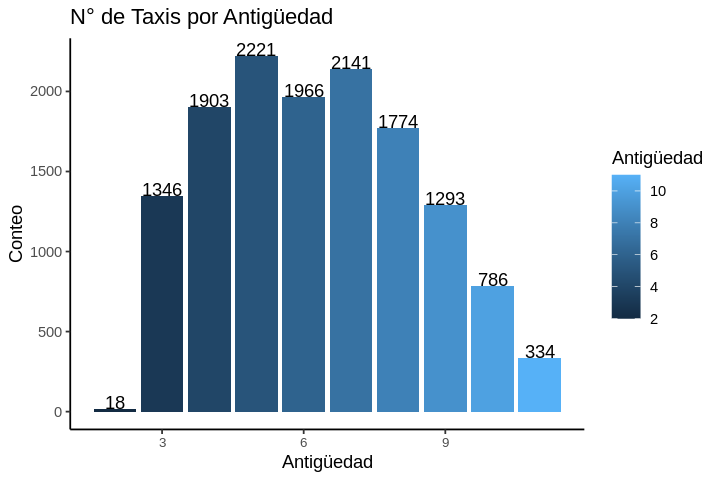

In [ ]:
taxiFlota %>%
  group_by(Antiguedad) %>% 
  summarise(N_Taxis = n()) %>%
  ggplot(aes(x=Antiguedad, y=N_Taxis)) + 
  geom_bar(stat = "identity", aes(fill = Antiguedad), position='dodge') +
  geom_text(aes(label=N_Taxis), vjust=0) +
  theme_classic() +
  labs(title = "N° de Taxis por Antigüedad",
       x = "Antigüedad", 
       y = "Conteo") +
  theme(axis.text.x = element_text(angle = 0, hjust = 0.5, size=8)) +
  labs(fill = "Antigüedad") # título de la leyenda

In [ ]:
taxiFlota$Rango_Antiguedad <- ordered(ifelse(taxiFlota$Antiguedad <=  2, '0-2', 
                                      ifelse(taxiFlota$Antiguedad <=  4, '3-4',
                                      ifelse(taxiFlota$Antiguedad <=  6, '5-6',
                                      ifelse(taxiFlota$Antiguedad <=  8, '7-8',
                                      ifelse(taxiFlota$Antiguedad <= 10, '9-10', '+10'))))),
                                      levels = c('0-2', '3-4', '5-6','7-8','9-10','+10' ))

`summarise()` has grouped output by 'Rango_Antiguedad'. You can override using the `.groups` argument.



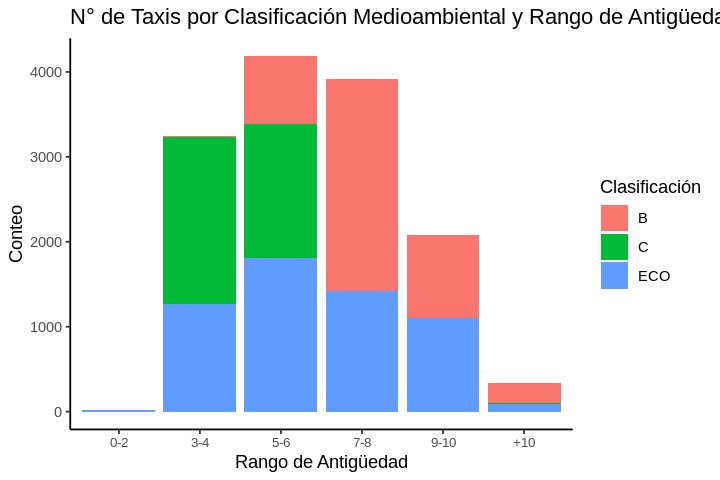

In [ ]:
taxiFlota %>%
  group_by(Rango_Antiguedad, Clasificacion) %>% 
  summarise(N_Taxis = n()) %>%
  ggplot(aes(x=Rango_Antiguedad, y=N_Taxis)) + 
  geom_bar(stat = "identity", aes(fill = Clasificacion)) +
  theme_classic() +
  labs(title = "N° de Taxis por Clasificación Medioambiental y Rango de Antigüedad",
       x = "Rango de Antigüedad", 
       y = "Conteo") +
  theme(axis.text.x = element_text(angle = 0, hjust = 0.5, size=8)) +
  labs(fill = "Clasificación") 

In [ ]:
taxiFlota$Rango_Antiguedad_Eurotaxi <- ordered(ifelse(taxiFlota$Antiguedad_Eurotaxi <=  2, '0-2', 
                                               ifelse(taxiFlota$Antiguedad_Eurotaxi <=  4, '3-4',
                                               ifelse(taxiFlota$Antiguedad_Eurotaxi <=  6, '5-6',
                                               ifelse(taxiFlota$Antiguedad_Eurotaxi <=  8, '7-8',
                                               ifelse(taxiFlota$Antiguedad_Eurotaxi <= 10, '9-10', '+10'))))),
                                               levels = c('0-2', '3-4', '5-6','7-8','9-10','+10' ))

`summarise()` has grouped output by 'Rango_Antiguedad_Eurotaxi'. You can override using the `.groups` argument.



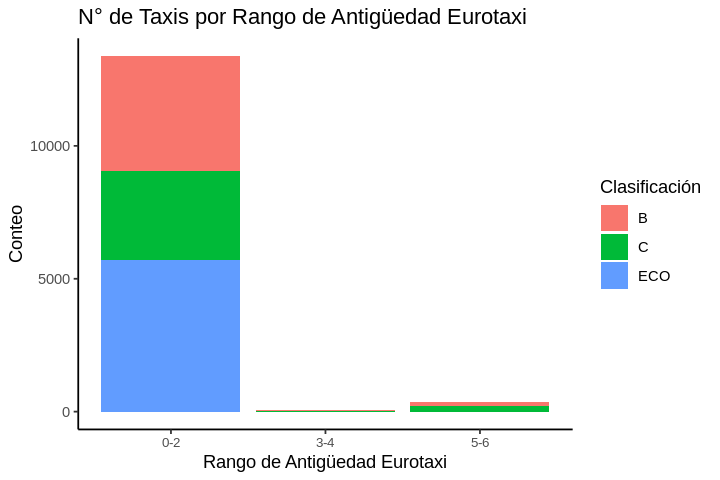

In [ ]:
taxiFlota %>%
  group_by(Rango_Antiguedad_Eurotaxi, Clasificacion) %>% 
  summarise(N_Taxis = n()) %>%
  ggplot(aes(x=Rango_Antiguedad_Eurotaxi, y=N_Taxis)) + 
  geom_bar(stat = "identity", aes(fill = Clasificacion)) +
  theme_classic() +
  labs(title = "N° de Taxis por Rango de Antigüedad Eurotaxi",
       x = "Rango de Antigüedad Eurotaxi", 
       y = "Conteo") +
  theme(axis.text.x = element_text(angle = 0, hjust = 0.5, size=8)) +
  labs(fill = "Clasificación") 

Eliminamos columnas que para seguir limpiando nuestros datos

In [ ]:
taxiFlota <- subset(taxiFlota, select = -Fecha)
taxiFlota <- subset(taxiFlota, select = -FechaMatriculacion)
taxiFlota <- subset(taxiFlota, select = -FechaIniServicio)
taxiFlota <- subset(taxiFlota, select = -FechaIni_Eurotaxi)
taxiFlota <- subset(taxiFlota, select = -FechaFin_Eurotaxi)
#taxiFlota <- subset(taxiFlota, select = -Eurotaxi)
taxiFlota <- subset(taxiFlota, select = -RegEspecial_Eurotaxi)
taxiFlota <- subset(taxiFlota, select = -Rango_Antiguedad)
taxiFlota <- subset(taxiFlota, select = -Rango_Antiguedad_Eurotaxi)
taxiFlota <- subset(taxiFlota, select = -Tipo)
taxiFlota <- subset(taxiFlota, select = -Variante)
taxiFlota <- subset(taxiFlota, select = -Matricula)
taxiFlota <- subset(taxiFlota, select = -Codigo)

In [ ]:
head(taxiFlota, 5)

,Marca,Year,Combustible,Modelo,Clasificacion,Cilindrada,Potencia,NumPlazas,Eurotaxi,PMR,Antiguedad,Antiguedad_Eurotaxi,Weight,Emissions
,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,CITROEN,2010,DIESEL,C8,B,2,100,5,SI,NO,10,5,1314.26,118.800
2,CITROEN,2010,DIESEL,C8,B,2,100,5,SI,NO,10,0,1314.26,118.800
3,CITROEN,2010,DIESEL,C8,B,2,100,5,SI,NO,10,6,1314.26,118.800
4,CITROEN,2010,DIESEL,C8,B,2,100,5,SI,NO,10,6,1314.26,118.800
5,CITROEN,2014,DIESEL,C4 PICASSO,C,2,110,5,NO,NO,6,0,1268.32,103.142


In [ ]:
taxiFlota_labeled <- data.frame(taxiFlota)

In [ ]:
taxiFlota_labeled$Clasificacion <- ordered(ifelse(taxiFlota_labeled$Clasificacion == "ECO", 0,
                                           ifelse(taxiFlota_labeled$Clasificacion == "A"  , 1,
                                           ifelse(taxiFlota_labeled$Clasificacion == "B"  , 2,
                                           ifelse(taxiFlota_labeled$Clasificacion == "C"  , 3, 99)))),
                                           levels = c(0, 1, 2, 3, 99))

In [ ]:
taxiFlota_labeled$Clasificacion <- as.numeric(as.character(taxiFlota_labeled$Clasificacion))

Utiilizamos la función <b>superml</b> para hacer el label encoding 

In [ ]:
label <- LabelEncoder$new()

In [ ]:
sort(unique(taxiFlota_labeled$Marca))

[1] "CITROEN"       "DACIA"         "FIAT"          "FORD"         
 [5] "HYUNDAI"       "MERCEDES-BENZ" "NISSAN"        "PEUGEOT"      
 [9] "RENAULT"       "SEAT"          "SKODA"         "SSANGYONG"    
[13] "TESLA"         "TOYOTA"        "VOLKSWAGEN"

In [ ]:
print(label$fit(taxiFlota_labeled$Marca))

[1] TRUE


In [ ]:
taxiFlota_labeled$Marca <- label$fit_transform(taxiFlota_labeled$Marca)

In [ ]:
sort(unique(taxiFlota_labeled$Marca))

[1]  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14

In [ ]:
taxiFlota_labeled$Combustible <- label$fit_transform(taxiFlota_labeled$Combustible)
taxiFlota_labeled$Modelo <- label$fit_transform(taxiFlota_labeled$Modelo)
taxiFlota_labeled$Eurotaxi <- label$fit_transform(taxiFlota_labeled$Eurotaxi)
taxiFlota_labeled$PMR <- label$fit_transform(taxiFlota_labeled$PMR)

In [ ]:
head(taxiFlota_labeled, 5)

,Marca,Year,Combustible,Modelo,Clasificacion,Cilindrada,Potencia,NumPlazas,Eurotaxi,PMR,Antiguedad,Antiguedad_Eurotaxi,Weight,Emissions
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,2010,0,0,2,2,100,5,0,0,10,5,1314.26,118.800
2,0,2010,0,0,2,2,100,5,0,0,10,0,1314.26,118.800
3,0,2010,0,0,2,2,100,5,0,0,10,6,1314.26,118.800
4,0,2010,0,0,2,2,100,5,0,0,10,6,1314.26,118.800
5,0,2014,0,1,3,2,110,5,1,0,6,0,1268.32,103.142


In [ ]:
# head(taxiFlota_labeled[, c(5, 1, 4, 2, 3, 6, 7, 9, 8, 10, 11, 12, 13, 14)], 5)

In [ ]:
taxiFlota_labeled <- taxiFlota_labeled[, c(5, 1, 4, 2, 3, 6, 7, 9, 8, 10, 11, 12, 13, 14)]

In [ ]:
head(taxiFlota_labeled, 5)

,Clasificacion,Marca,Modelo,Year,Combustible,Cilindrada,Potencia,Eurotaxi,NumPlazas,PMR,Antiguedad,Antiguedad_Eurotaxi,Weight,Emissions
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,0,0,2010,0,2,100,0,5,0,10,5,1314.26,118.800
2,2,0,0,2010,0,2,100,0,5,0,10,0,1314.26,118.800
3,2,0,0,2010,0,2,100,0,5,0,10,6,1314.26,118.800
4,2,0,0,2010,0,2,100,0,5,0,10,6,1314.26,118.800
5,3,0,1,2014,0,2,110,1,5,0,6,0,1268.32,103.142


In [ ]:
str(taxiFlota_labeled)

'data.frame':	13782 obs. of  14 variables:
 $ Clasificacion      : num  2 2 2 2 3 3 3 0 3 3 ...
 $ Marca              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Modelo             : num  0 0 0 0 1 1 1 2 1 1 ...
 $ Year               : num  2010 2010 2010 2010 2014 ...
 $ Combustible        : num  0 0 0 0 0 0 0 1 0 0 ...
 $ Cilindrada         : num  2 2 2 2 2 2 2 1.6 2 2 ...
 $ Potencia           : num  100 100 100 100 110 110 110 85 110 110 ...
 $ Eurotaxi           : num  0 0 0 0 1 1 1 1 1 1 ...
 $ NumPlazas          : num  5 5 5 5 5 5 5 5 5 5 ...
 $ PMR                : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Antiguedad         : num  10 10 10 10 6 6 6 6 6 6 ...
 $ Antiguedad_Eurotaxi: num  5 0 6 6 0 0 0 0 0 0 ...
 $ Weight             : num  1314 1314 1314 1314 1268 ...
 $ Emissions          : num  119 119 119 119 103 ...


## MATRIZ DE CORRELACIÓN

### PEARSON

In [ ]:
symnum(cormat_P <- cor(taxiFlota_labeled, method = "pearson"))

                    Cls Mr Md Y Cm Cln Pt Er N PM An A_ W Em
Clasificacion       1                                       
Marca                   1                                   
Modelo                  B  1                                
Year                    .  .  1                             
Combustible         ,   .  .    1                           
Cilindrada              .       .  1                        
Potencia            .           .      1                    
Eurotaxi                                  1                 
NumPlazas                                 ,  1              
PMR                                       .    1            
Antiguedad              .  .  *                   1         
Antiguedad_Eurotaxi                       B  , .     1      
Weight                  .  .    .  .                    1   
Emissions                       .                         1 
attr(,"legend")
[1] 0 ‘ ’ 0.3 ‘.’ 0.6 ‘,’ 0.8 ‘+’ 0.9 ‘*’ 0.95 ‘B’ 1

In [ ]:
cormat_P

,Clasificacion,Marca,Modelo,Year,Combustible,Cilindrada,Potencia,Eurotaxi,NumPlazas,PMR,Antiguedad,Antiguedad_Eurotaxi,Weight,Emissions
Clasificacion,1.00000000,-0.218023411,-0.100878719,0.24655983,-0.76239085,-0.15678295,0.55362401,-0.154872940,0.12059540,0.083427364,-0.22359008,0.150351051,-0.07450901,0.28002248
Marca,-0.21802341,1.000000000,0.984100237,-0.37302979,0.53665473,0.32335871,-0.15734164,0.006490389,-0.08632352,0.010896481,0.32806472,-0.004956622,0.52603484,-0.26069037
Modelo,-0.10087872,0.984100237,1.000000000,-0.35017729,0.41306384,0.26249787,-0.10844009,0.048881482,-0.11058010,-0.003917939,0.31194645,-0.046482555,0.47764643,-0.20128618
Year,0.24655983,-0.373029789,-0.350177294,1.00000000,-0.17503746,-0.23624546,0.17055761,-0.133062872,0.15742373,0.097406991,-0.93332774,0.128094361,-0.23329483,-0.17035347
Combustible,-0.76239085,0.536654730,0.413063839,-0.17503746,1.00000000,0.39836977,-0.40395271,0.119861403,-0.07197296,-0.053323797,0.13387861,-0.116878401,0.33713358,-0.56656997
Cilindrada,-0.15678295,0.323358713,0.262497874,-0.23624546,0.39836977,1.00000000,0.29366228,-0.137458266,0.21422108,0.084201764,0.20880782,0.138942509,0.56336123,-0.08575962
Potencia,0.55362401,-0.157341640,-0.108440088,0.17055761,-0.40395271,0.29366228,1.00000000,-0.105541709,0.16517890,0.027358464,-0.16669709,0.101229419,0.28104216,0.03934086
Eurotaxi,-0.15487294,0.006490389,0.048881482,-0.13306287,0.11986140,-0.13745827,-0.10554171,1.000000000,-0.63100602,-0.444878797,0.16462608,-0.975112911,-0.24345907,-0.12383087
NumPlazas,0.12059540,-0.086323517,-0.110580104,0.15742373,-0.07197296,0.21422108,0.16517890,-0.631006017,1.00000000,0.274972731,-0.16404362,0.625117295,0.20735609,0.08009021
PMR,0.08342736,0.010896481,-0.003917939,0.09740699,-0.05332380,0.08420176,0.02735846,-0.444878797,0.27497273,1.000000000,-0.09955965,0.408014443,0.09180286,0.04536405


### SPEARMAN

In [ ]:
symnum(cormat_S <- cor(taxiFlota_labeled, method = "spearman"))

                    Cls Mr Md Y Cm Cln Pt Er N PM An A_ W Em
Clasificacion       1                                       
Marca               .   1                                   
Modelo              .   B  1                                
Year                .   .     1                             
Combustible         +   .  .    1                           
Cilindrada              .  .    .  1                        
Potencia            ,   .  .    ,      1                    
Eurotaxi                                  1                 
NumPlazas                                 ,  1              
PMR                                       .    1            
Antiguedad          .         *                   1         
Antiguedad_Eurotaxi                       B  , .     1      
Weight                  ,  ,  . .  .                    1   
Emissions                  .    .                         1 
attr(,"legend")
[1] 0 ‘ ’ 0.3 ‘.’ 0.6 ‘,’ 0.8 ‘+’ 0.9 ‘*’ 0.95 ‘B’ 1

In [ ]:
cormat_S

,Clasificacion,Marca,Modelo,Year,Combustible,Cilindrada,Potencia,Eurotaxi,NumPlazas,PMR,Antiguedad,Antiguedad_Eurotaxi,Weight,Emissions
Clasificacion,1.00000000,-0.37239414,-0.32063696,0.32065148,-0.87799671,-0.27255507,0.77259939,-0.15331548,0.13728733,0.08805608,-0.30319004,0.14916337,-0.24449499,0.25504089
Marca,-0.37239414,1.00000000,0.98225101,-0.33873109,0.48816572,0.48829591,-0.45924054,-0.06256416,-0.02614330,0.02675924,0.28877857,0.06307777,0.76665080,-0.28780641
Modelo,-0.32063696,0.98225101,1.00000000,-0.21859620,0.46220210,0.46067543,-0.42185883,-0.05987293,-0.02384061,0.02588020,0.17170876,0.06042420,0.74117313,-0.32262787
Year,0.32065148,-0.33873109,-0.21859620,1.00000000,-0.11718192,-0.25185351,0.26918343,-0.14117624,0.17572948,0.10081095,-0.93631203,0.13701598,-0.31139713,-0.08064934
Combustible,-0.87799671,0.48816572,0.46220210,-0.11718192,1.00000000,0.40791369,-0.76226276,0.14436250,-0.09308138,-0.06422381,0.08871815,-0.14130453,0.37871707,-0.46184699
Cilindrada,-0.27255507,0.48829591,0.46067543,-0.25185351,0.40791369,1.00000000,-0.24991571,-0.08739475,0.13199644,0.05576307,0.21661619,0.08867167,0.59055070,-0.22570655
Potencia,0.77259939,-0.45924054,-0.42185883,0.26918343,-0.76226276,-0.24991571,1.00000000,-0.09164787,0.10900002,0.02390347,-0.25067119,0.08883958,-0.24382519,0.20308027
Eurotaxi,-0.15331548,-0.06256416,-0.05987293,-0.14117624,0.14436250,-0.08739475,-0.09164787,1.00000000,-0.69269576,-0.44487880,0.16914431,-0.97881744,-0.21218303,-0.14808942
NumPlazas,0.13728733,-0.02614330,-0.02384061,0.17572948,-0.09308138,0.13199644,0.10900002,-0.69269576,1.00000000,0.28259827,-0.17949059,0.68308076,0.16571363,0.10158263
PMR,0.08805608,0.02675924,0.02588020,0.10081095,-0.06422381,0.05576307,0.02390347,-0.44487880,0.28259827,1.00000000,-0.10182692,0.41993080,0.07738034,0.05810670


### VISUALIZACIÓN MATRIZ DE CORRELACIÓN PEARSON

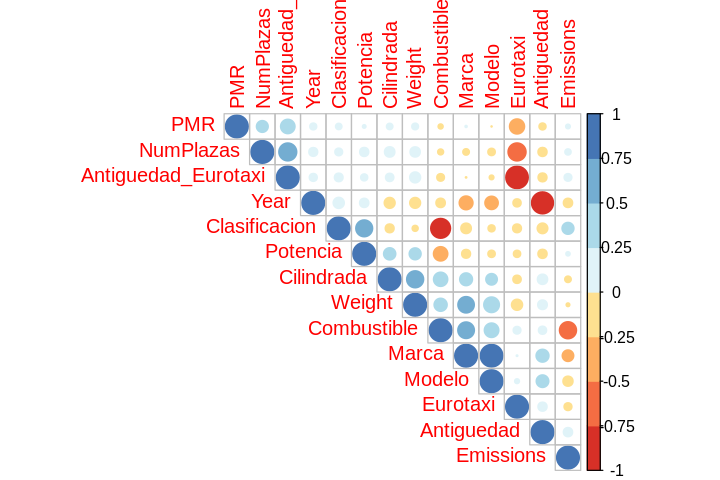

In [ ]:
corrplot(cormat_P, type="upper", order="hclust", col=brewer.pal(n=8, name="RdYlBu"))

### VISUALIZACIÓN MATRIZ DE CORRELACIÓN SPEARMAN

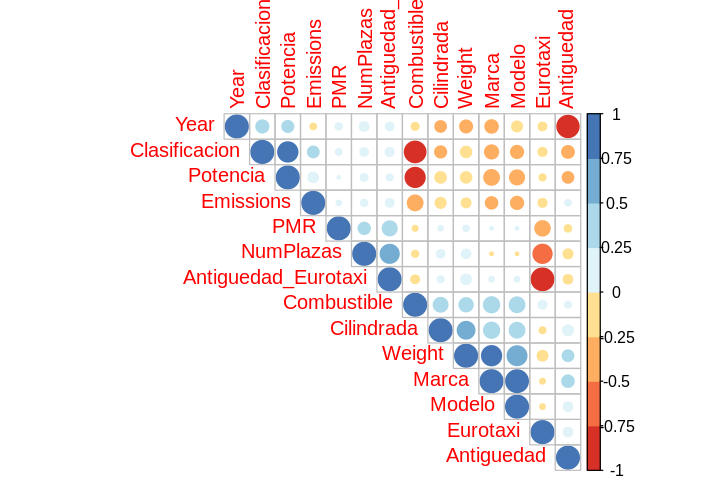

In [ ]:
corrplot(cormat_S, type="upper", order="hclust", col=brewer.pal(n=8, name="RdYlBu"))

### TAMBIÉN SE PUEDE HACER CON LA FUNCIÓN cormat

In [ ]:
source("http://www.sthda.com/upload/rquery_cormat.r")

row,column,cor,p
<chr>,<chr>,<dbl>,<dbl>
PMR,NumPlazas,0.2700,1.4e-237
PMR,Antiguedad_Eurotaxi,0.4100,0.0e+00
NumPlazas,Antiguedad_Eurotaxi,0.6300,0.0e+00
PMR,Year,0.0970,2.1e-30
NumPlazas,Year,0.1600,3.5e-77
Antiguedad_Eurotaxi,Year,0.1300,1.7e-51
PMR,Clasificacion,0.0830,1.0e-22
NumPlazas,Clasificacion,0.1200,8.2e-46
Antiguedad_Eurotaxi,Clasificacion,0.1500,1.7e-70


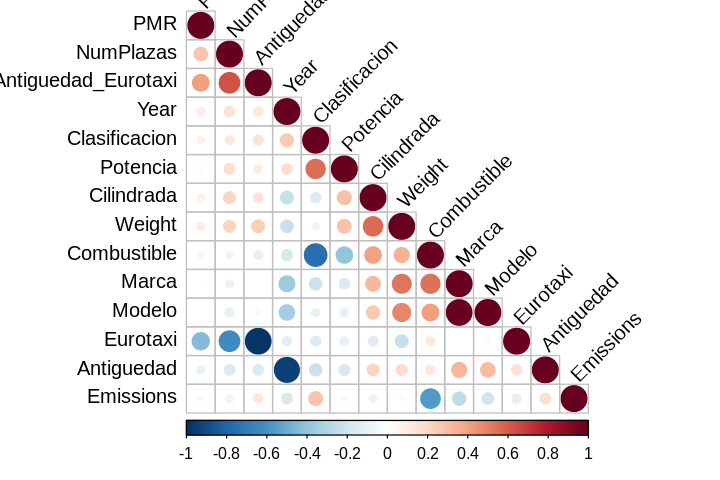

In [ ]:
rquery.cormat(taxiFlota_labeled, type="flatten")
#rquery.cormat(taxiFlota_labeled, type="upper") 

row,column,cor,p
<chr>,<chr>,<dbl>,<dbl>
PMR,NumPlazas,0.2700,1.4e-237
PMR,Antiguedad_Eurotaxi,0.4100,0.0e+00
NumPlazas,Antiguedad_Eurotaxi,0.6300,0.0e+00
PMR,Year,0.0970,2.1e-30
NumPlazas,Year,0.1600,3.5e-77
Antiguedad_Eurotaxi,Year,0.1300,1.7e-51
PMR,Clasificacion,0.0830,1.0e-22
NumPlazas,Clasificacion,0.1200,8.2e-46
Antiguedad_Eurotaxi,Clasificacion,0.1500,1.7e-70


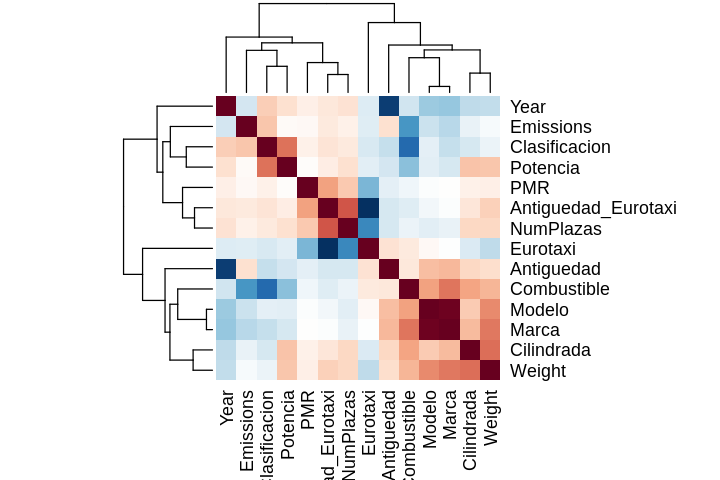

In [ ]:
rquery.cormat(taxiFlota_labeled, type="flatten", graphType="heatmap")

En las dos correlaciones Pearson y Spearman: observamos las variables que más correlación tienen con Clasificacion son: Combustible y Potencia.

La antigüedad, cilindrada, emisiones y el número de plazas no son variables relevantes para nuestro modelo.

In [ ]:
taxiFlota_corr <- taxiFlota_labeled %>% dplyr::select("Clasificacion","Combustible","Potencia")

In [ ]:
head(taxiFlota_corr, 3)

,Clasificacion,Combustible,Potencia
,<dbl>,<dbl>,<dbl>
1,2,0,100
2,2,0,100
3,2,0,100


# TAREA #5: CREAR EL DATASET DE ENTRENAMIENTO Y DE TESTING

In [ ]:
set.seed(1234)

## SUPORT VECTOR MACHINE

In [ ]:
taxiFlota_svm <- data.frame(taxiFlota_corr)

In [ ]:
split <- sample.split(taxiFlota_svm$Clasificacion, SplitRatio = 0.75)

In [ ]:
training_set <- subset(taxiFlota_svm, split == TRUE)
test_set <- subset(taxiFlota_svm, split == FALSE)

In [ ]:
print(paste("TRAINING:", NROW(training_set)
            , " >>> TEST:", NROW(test_set)
            , sep=" "))

[1] "TRAINING: 10336  >>> TEST: 3446"


In [ ]:
head(training_set, 3)

,Clasificacion,Combustible,Potencia
,<dbl>,<dbl>,<dbl>
1,2,0,100
2,2,0,100
3,2,0,100


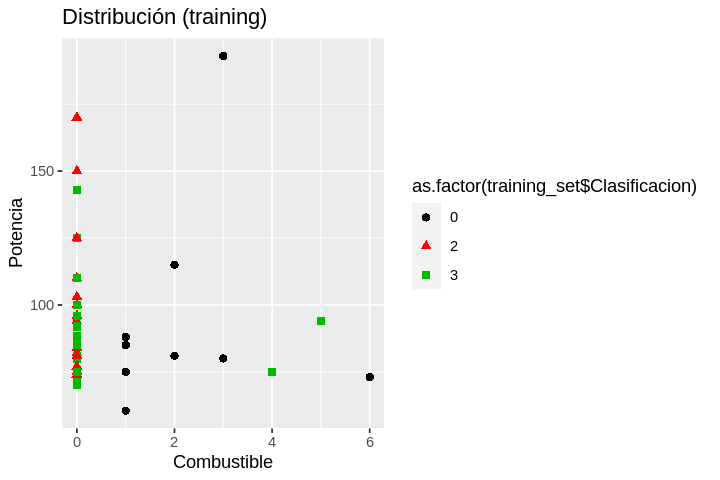

In [ ]:
# plot data set
training_set %>%
ggplot(aes(x = Combustible
         , y = Potencia
         , color = as.factor(training_set$Clasificacion)
         , shape = as.factor(training_set$Clasificacion))) + 
  geom_point(size = 2) +
  scale_color_manual(values=c("#000000","#FF0000","#00BA00")) +
  labs(title = "Distribución (training)",
       x = "Combustible", 
       y = "Potencia")

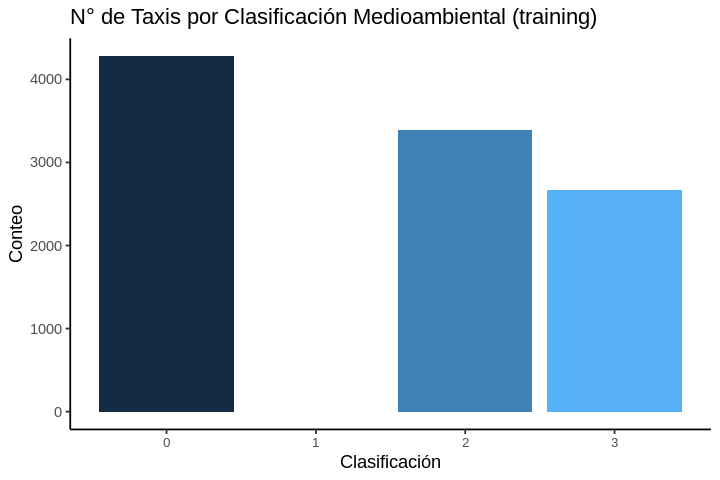

In [ ]:
training_set %>%
  group_by(Clasificacion) %>% 
  summarise(N_Taxis = n()) %>%
  ggplot(aes(x=Clasificacion, y=N_Taxis)) + 
  geom_bar(stat = "identity", aes(fill = Clasificacion)) +
  theme_classic() +
  labs(title = "N° de Taxis por Clasificación Medioambiental (training)",
       x = "Clasificación", 
       y = "Conteo") +
  theme(axis.text.x = element_text(angle = 0, hjust = 0.5, size=8)) +
  labs(fill = "Clasificación")  +
  theme(legend.position = "none")

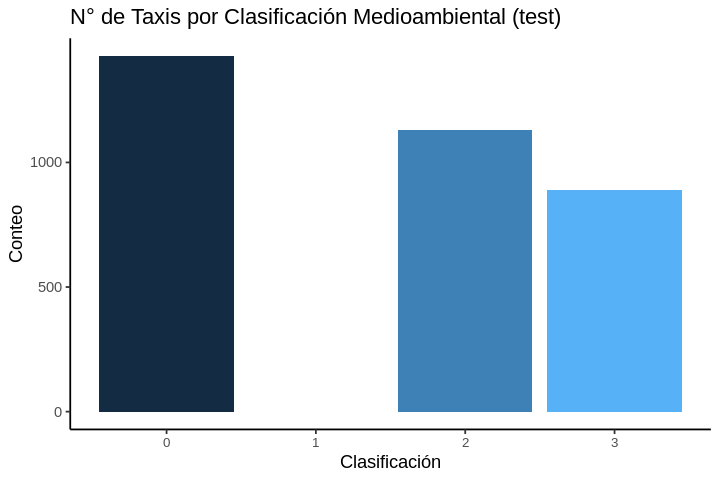

In [ ]:
test_set %>%
  group_by(Clasificacion) %>% 
  summarise(N_Taxis = n()) %>%
  ggplot(aes(x=Clasificacion, y=N_Taxis)) + 
  geom_bar(stat = "identity", aes(fill = Clasificacion)) +
  theme_classic() +
  labs(title = "N° de Taxis por Clasificación Medioambiental (test)",
       x = "Clasificación", 
       y = "Conteo") +
  theme(axis.text.x = element_text(angle = 0, hjust = 0.5, size=8)) +
  labs(fill = "Clasificación")  +
  theme(legend.position = "none")

Normalización de los datos para training y test, esto nos permite tener mayor precisición en la predicción del algoritmo.

In [ ]:
training_set[-1] <- scale(training_set[-1])
test_set[-1] <- scale(test_set[-1])

In [ ]:
head(training_set, 3)

,Clasificacion,Combustible,Potencia
,<dbl>,<dbl>,<dbl>
1,2,-0.6753421,2.140383
2,2,-0.6753421,2.140383
3,2,-0.6753421,2.140383


In [ ]:
str(training_set)

'data.frame':	10336 obs. of  3 variables:
 $ Clasificacion: num  2 2 2 2 3 3 0 3 3 3 ...
 $ Combustible  : num  -0.675 -0.675 -0.675 -0.675 -0.675 ...
 $ Potencia     : num  2.14 2.14 2.14 2.14 3.16 ...


In [ ]:
str(test_set)

'data.frame':	3446 obs. of  3 variables:
 $ Clasificacion: num  3 0 3 3 3 0 2 0 0 0 ...
 $ Combustible  : num  -0.681 -0.295 -0.681 -0.681 -0.681 ...
 $ Potencia     : num  3.167 0.619 3.167 3.167 3.167 ...


### Usamos el algoritmo de clasifiación SVM con Kernel Polynominal

In [ ]:
classifier_polynomial <- svm(formula = Clasificacion ~ .,
                                data = training_set,
                                type = 'C-classification',
                               scale = FALSE,
                               cross = 10,        
                              kernel = 'polynomial')

y_pred <- predict(classifier_polynomial, newdata = test_set[-1])
y_train_pred <- predict(classifier_polynomial, newdata = training_set[-1])

cm_test_polynomial     <- table(test_set[, 1], y_pred)
cm_training_polynomial <- table(training_set[, 1], y_train_pred )

In [ ]:
summary(classifier_polynomial)


Call:
svm(formula = Clasificacion ~ ., data = training_set, type = "C-classification", 
    cross = 10, kernel = "polynomial", scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  1 
     degree:  3 
     coef.0:  0 

Number of Support Vectors:  2757

 ( 1251 1244 262 )


Number of Classes:  3 

Levels: 
 0 2 3

10-fold cross-validation on training data:

Total Accuracy: 93.9048 
Single Accuracies:
 93.80445 94.294 94.38529 93.71373 93.71373 94.77251 93.32689 93.12682 94.00387 93.90716 




In [ ]:
classifier_polynomial$tot.accuracy

[1] 93.9048

In [ ]:
cm_test_polynomial

   y_pred
       0    2    3
  0 1427    0    0
  2    0 1035   95
  3    8  108  773

In [ ]:
SVM_polynomial_accuracy_test <- (sum(diag(cm_test_polynomial)) / nrow(test_set)) * 100
SVM_polynomial_accuracy_test

[1] 93.87696

In [ ]:
cm_training_polynomial

   y_train_pred
       0    2    3
  0 4281    0    0
  2    0 3111  278
  3   10  342 2314

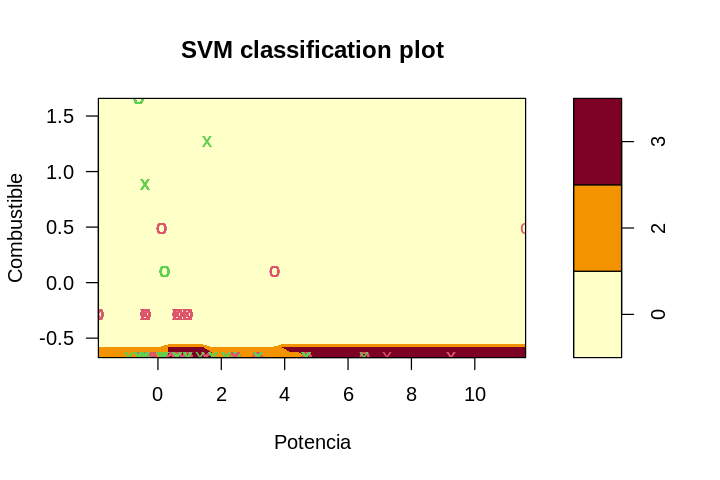

In [ ]:
plot(classifier_polynomial, training_set)

Los <b>puntos representados por una “X”</b> son los vectores de apoyo (<i><b>support vectors</b></i>), son los puntos que afectan directamente la línea de clasificación.<br>
Los <b>marcados con una "o"</b> son los que no afectan el cálculo de la línea de clasificación.<br>

### LA FUNCIÓN TUNE()

In [ ]:
# Si usamos un kernel linear o polynomial, NO necesitaremos definir gamma.
if ( (Kernel == "polynomial") || (Kernel == "linear") ) {
    Ranges <- list( cost  = c(0.01 , 0.1 , 1 , 5 , 10) )
} else {
    Ranges <- list( cost  = c(0.01 , 0.1 , 1 , 5 , 10)
                  , gamma = c(0.001 , 0.01 , 0.1 , 1 , 5)
                  )
}

Ranges

$cost
[1]  0.01  0.10  1.00  5.00 10.00

In [ ]:
# Start the clock!
start_time <- proc.time()

In [ ]:
# encontrar el costo óptimo de clasificación errónea; así como gamma
tune.out <- tune(svm 
                 , factor(Clasificacion) ~ .       # la variable dependiente debe ser un factor
                 , data = training_set
                 , kernel = Kernel
                 , scale = FALSE
                 , type = "C-classification"
                 , ranges = Ranges
                 , tunecontrol = tune.control(sampling = "fix")
                )

In [ ]:
# End the clock!
process_time <- proc.time() - start_time
process_time[3]/60 #minutos

elapsed 
0.4281667

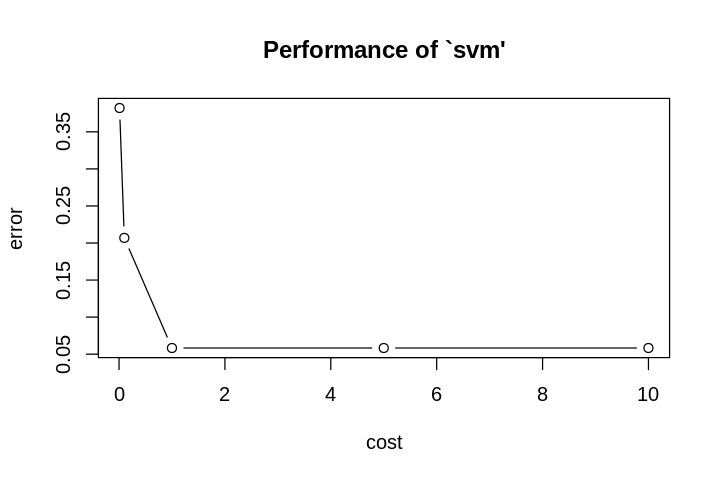

In [ ]:
plot(tune.out)

In [ ]:
bestmodel <- tune.out$best.model

In [ ]:
bestmodel


Call:
best.tune(method = svm, train.x = factor(Clasificacion) ~ ., data = training_set, 
    ranges = Ranges, tunecontrol = tune.control(sampling = "fix"), 
    kernel = Kernel, scale = FALSE, type = "C-classification")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  1 
     degree:  3 
     coef.0:  0 

Number of Support Vectors:  2757


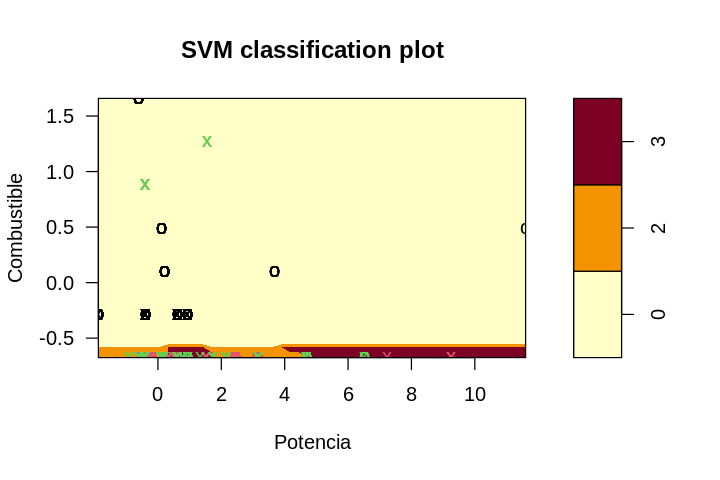

In [ ]:
plot(bestmodel, training_set)

In [ ]:
head(bestmodel$SV, 5)

,Combustible,Potencia
1,-0.6753421,2.140383
2,-0.6753421,2.140383
3,-0.6753421,2.140383
4,-0.6753421,2.140383
28,-0.6753421,1.529894


In [ ]:
w <- t(bestmodel$coefs) %*% bestmodel$SV
w

Combustible,Potencia
45.6804,-12.57694
-212.7573,28.82671


In [ ]:
#The negative intercept is stored in...
bestmodel$rho

[1] 0.03511827 1.16512942 1.16490842

In [ ]:
y_pred <- predict(bestmodel, newdata = test_set[-1])
y_train_pred <- predict(bestmodel, newdata = training_set[-1])

Vemos la <b>matriz de confusión</b>.

In [ ]:
cm_test_tuned     <- table(predict = test_set[, 1], truth = y_pred)
cm_training_tuned <- table(predict = training_set[, 1], truth = y_train_pred)

In [ ]:
cm_test_tuned

       truth
predict    0    2    3
      0 1427    0    0
      2    0 1035   95
      3    8  108  773

In [ ]:
SVM_tuned_accuracy_test <- (sum(diag(cm_test_tuned)) / nrow(test_set)) * 100
SVM_tuned_accuracy_test

[1] 93.87696


Los resultados de la Matriz de confuasión muestran que hubo 3235 predicciones correctas: 1427 + 1035 + 773 y 211 predicciones incorrectas: 8+108+95, en el conjunto de prueba.

In [ ]:
print(paste("TEST ACCURACY = ", round(SVM_tuned_accuracy_test, 4), "%", sep=""))

[1] "TEST ACCURACY = 93.877%"


Y el resultado de la <b>matriz de confusión</b> para el conjunto de entrenamiento.

In [ ]:
cm_training_tuned

       truth
predict    0    2    3
      0 4281    0    0
      2    0 3111  278
      3   10  342 2314

In [ ]:
print(paste("TRAINING ACCURACY = ", round((sum(diag(cm_training_tuned)) / nrow(training_set)) * 100, 4), "%", sep=""))

[1] "TRAINING ACCURACY = 93.9048%"


Visualizamos los datos

In [ ]:
set <- test_set

In [ ]:
X1 <- seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
X2 <- seq(min(set[, 3]) - 1, max(set[, 3]) + 1, by = 0.01)

In [ ]:
grid_set <- expand.grid(X1, X2)
colnames(grid_set) <- c("Combustible", "Potencia")

In [ ]:
y_grid <- predict(bestmodel, newdata = grid_set)

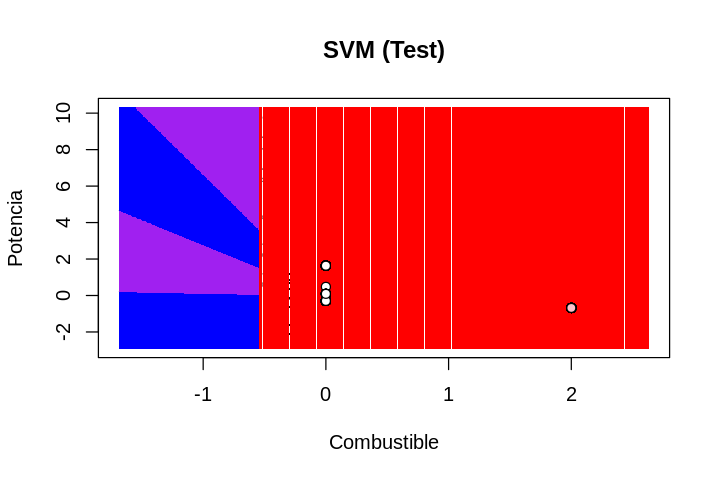

In [ ]:
plot(set[, -1],
     main = 'SVM (Test)',
     xlab = 'Combustible', 
     ylab = 'Potencia',
     xlim = range(X1), 
     ylim = range(X2))

contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)

points(grid_set
       , pch = '.'
       , col = ifelse(y_grid == 0, 'red'
                      , ifelse(y_grid == 1, 'green'
                      , ifelse(y_grid == 2, 'blue', 'purple')))
      )

points(set
       , pch = 21
       , bg = ifelse(set[, 1] == 0, 'white'
                     , ifelse(set[, 1] == 1, 'yellow'
                     , ifelse(set[, 1] == 2, 'pink', 'red3')))
       )

## ÁRBOLES DE DECISIÓN

Los <b>árboles de decisión</b> son, principalmente, de dos tipos:
* <b>clasificación</b>, la variable a analizar es un factor
* <b>regresión</b>, la variable a analizar es numérica

In [ ]:
taxiFlota_CART <- data.frame(taxiFlota_corr)

In [ ]:
taxiFlota_CART$Clasificacion <- as.factor(taxiFlota_CART$Clasificacion)

In [ ]:
str(taxiFlota_CART)

'data.frame':	13782 obs. of  3 variables:
 $ Clasificacion: Factor w/ 3 levels "0","2","3": 2 2 2 2 3 3 3 1 3 3 ...
 $ Combustible  : num  0 0 0 0 0 0 0 1 0 0 ...
 $ Potencia     : num  100 100 100 100 110 110 110 85 110 110 ...


In [ ]:
split <- sample.split(taxiFlota_CART$Clasificacion, SplitRatio = 0.75)

In [ ]:
training_set <- subset(taxiFlota_CART, split == TRUE)
test_set <- subset(taxiFlota_CART, split == FALSE)

In [ ]:
print(paste("TRAINING:", NROW(training_set)
            , " >>> TEST:", NROW(test_set)
            , sep=" "))

[1] "TRAINING: 10336  >>> TEST: 3446"


In [ ]:
tree <- rpart(Clasificacion ~., data = training_set)
tree

n= 10336 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 10336 6055 0 (0.414183437 0.327883127 0.257933437)  
   2) Combustible>=0.5 4295   14 0 (0.996740396 0.000000000 0.003259604) *
   3) Combustible< 0.5 6041 2652 2 (0.000000000 0.560999834 0.439000166)  
     6) Potencia< 78.5 3015  221 2 (0.000000000 0.926699834 0.073300166)  
      12) Potencia>=73.5 2869   75 2 (0.000000000 0.973858487 0.026141513) *
      13) Potencia< 73.5 146    0 3 (0.000000000 0.000000000 1.000000000) *
     7) Potencia>=78.5 3026  595 3 (0.000000000 0.196629213 0.803370787)  
      14) Potencia>=93 668  227 2 (0.000000000 0.660179641 0.339820359)  
        28) Potencia< 105 443   43 2 (0.000000000 0.902934537 0.097065463) *
        29) Potencia>=105 225   41 3 (0.000000000 0.182222222 0.817777778) *
      15) Potencia< 93 2358  154 3 (0.000000000 0.065309584 0.934690416)  
        30) Potencia< 84.5 521  154 3 (0.000000000 0.295585413 0.704414587)  
          60) Potencia>=8

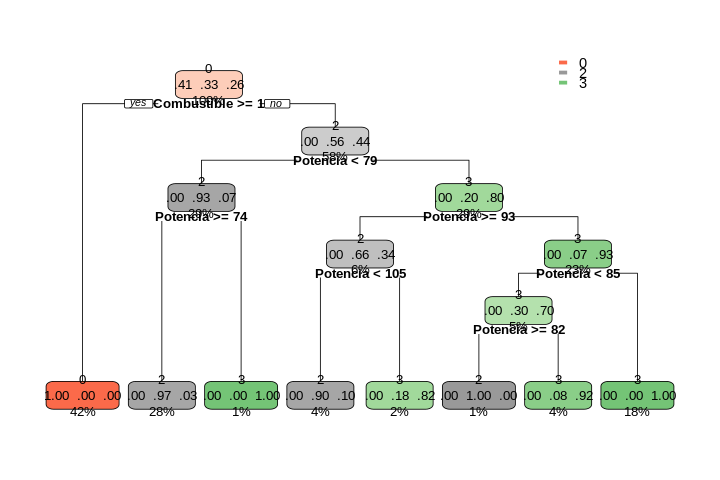

In [ ]:
rpart.plot(tree)

In [ ]:
printcp(tree)


Classification tree:
rpart(formula = Clasificacion ~ ., data = training_set)

Variables actually used in tree construction:
[1] Combustible Potencia   

Root node error: 6055/10336 = 0.58582

n= 10336 

        CP nsplit rel error   xerror      xstd
1 0.559703      0  1.000000 1.000000 0.0082706
2 0.303220      1  0.440297 0.440297 0.0073458
3 0.035343      2  0.137077 0.137077 0.0045630
4 0.024112      3  0.101734 0.101899 0.0039780
5 0.023617      4  0.077622 0.083567 0.0036229
6 0.010074      5  0.054005 0.054170 0.0029432
7 0.010000      7  0.033856 0.043435 0.0026440


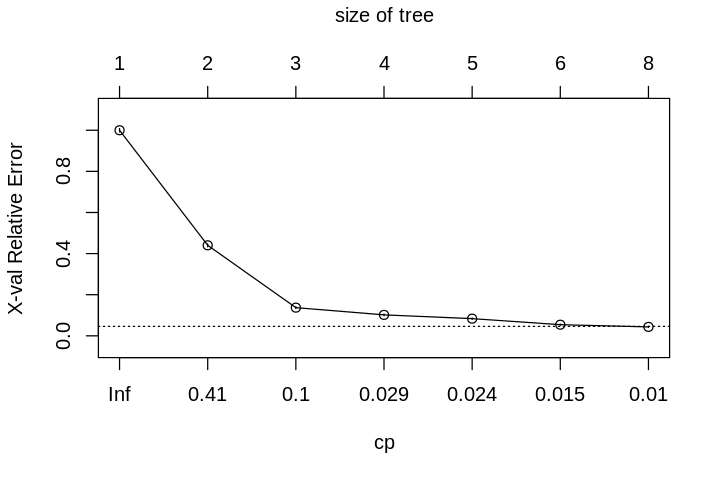

In [ ]:
plotcp(tree)

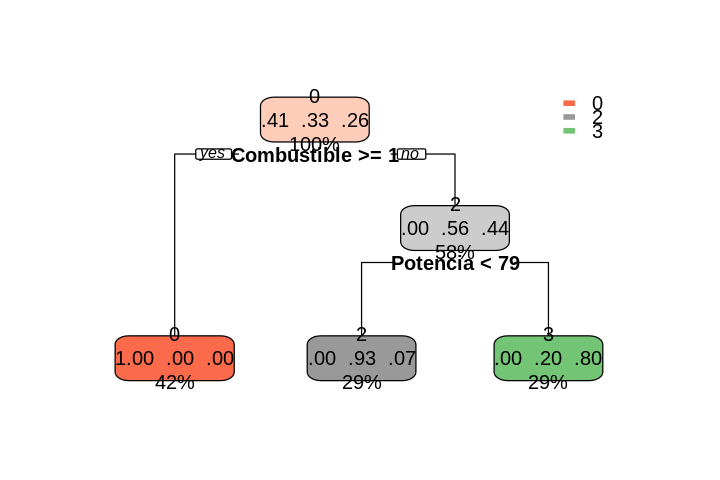

In [ ]:
tree <- rpart(Clasificacion ~., data = training_set, cp=0.036499)
rpart.plot(tree)

In [ ]:
printcp(tree)


Classification tree:
rpart(formula = Clasificacion ~ ., data = training_set, cp = 0.036499)

Variables actually used in tree construction:
[1] Combustible Potencia   

Root node error: 6055/10336 = 0.58582

n= 10336 

        CP nsplit rel error  xerror      xstd
1 0.559703      0   1.00000 1.00000 0.0082706
2 0.303220      1   0.44030 0.44030 0.0073458
3 0.036499      2   0.13708 0.13708 0.0045630


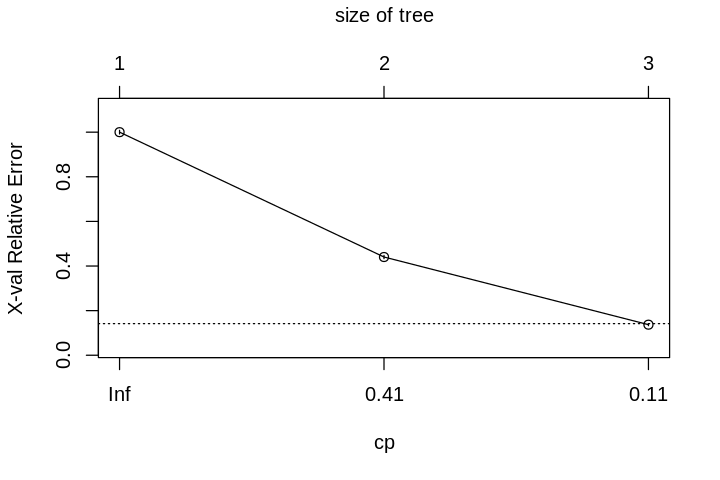

In [ ]:
plotcp(tree)

### EVALUAMOS EL MODELO

In [ ]:
p <- predict(tree, test_set, type = "class")

In [ ]:
cm_tree <- confusionMatrix(p, test_set$Clasificacion, positive="y")
cm_tree

Confusion Matrix and Statistics

          Reference
Prediction    0    2    3
         0 1427    0    4
         2    0  907   64
         3    0  223  821

Overall Statistics
                                          
               Accuracy : 0.9156          
                 95% CI : (0.9058, 0.9246)
    No Information Rate : 0.4141          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8716          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 0 Class: 2 Class: 3
Sensitivity            1.0000   0.8027   0.9235
Specificity            0.9980   0.9724   0.9128
Pos Pred Value         0.9972   0.9341   0.7864
Neg Pred Value         1.0000   0.9099   0.9717
Prevalence             0.4141   0.3279   0.2580
Detection Rate         0.4141   0.2632   0.2382
Detection Prevalence   0.4153   0.2818   0.3030
Balanced Accuracy      0.9990

In [ ]:
str(cm_tree) 

List of 6
 $ positive: chr "y"
 $ table   : 'table' int [1:3, 1:3] 1427 0 0 0 907 223 4 64 821
  ..- attr(*, "dimnames")=List of 2
  .. ..$ Prediction: chr [1:3] "0" "2" "3"
  .. ..$ Reference : chr [1:3] "0" "2" "3"
 $ overall : Named num [1:7] 0.916 0.872 0.906 0.925 0.414 ...
  ..- attr(*, "names")= chr [1:7] "Accuracy" "Kappa" "AccuracyLower" "AccuracyUpper" ...
 $ byClass : num [1:3, 1:11] 1 0.803 0.924 0.998 0.972 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:3] "Class: 0" "Class: 2" "Class: 3"
  .. ..$ : chr [1:11] "Sensitivity" "Specificity" "Pos Pred Value" "Neg Pred Value" ...
 $ mode    : chr "sens_spec"
 $ dots    : list()
 - attr(*, "class")= chr "confusionMatrix"


In [ ]:
cm_tree$overall

Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
     0.9155543      0.8715617      0.9057689      0.9246275      0.4141033 
AccuracyPValue  McnemarPValue 
     0.0000000            NaN

In [ ]:
tree_accuracy_test <- cm_tree$overall[1]
tree_accuracy_test

Accuracy 
0.9155543

In [ ]:
tree_accuracy_test <- as.numeric(gsub(".*:","",tree_accuracy_test))
tree_accuracy_test

[1] 0.9155543

### ROC (datos de test)

In [ ]:
p1 <- predict(tree, test_set, type = 'prob')
head(p1, 5)

,0,2,3
3,0,0.1966292,0.8033708
5,0,0.1966292,0.8033708
6,0,0.1966292,0.8033708
13,0,0.1966292,0.8033708
21,0,0.1966292,0.8033708


In [ ]:
p1 <- p1[,2]

In [ ]:
r <- multiclass.roc(test_set$Clasificacion, p1, percent = TRUE)

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls > cases



In [ ]:
tree_AUC <- as.numeric(r$auc)
tree_AUC

[1] 95.45087

## RANDOM FOREST

Los <b>random forest</b> se basan en una idea simple: 
la suma de los resultados de múltiples predictores.


In [ ]:
taxiFlota_RF <- data.frame(taxiFlota_corr)

In [ ]:
taxiFlota_RF$Clasificacion <- as.factor(taxiFlota_RF$Clasificacion)

In [ ]:
split <- sample.split(taxiFlota_RF$Clasificacion, SplitRatio = 0.75)

In [ ]:
training_set <- subset(taxiFlota_RF, split == TRUE)
test_set <- subset(taxiFlota_RF, split == FALSE)

In [ ]:
print(paste("TRAINING:", NROW(training_set)
            , " >>> TEST:", NROW(test_set)
            , sep=" "))

[1] "TRAINING: 10336  >>> TEST: 3446"


Usamos la función de <b>F-fold cross-validation</b>.<br>
R tiene una función para dividir aleatoriamente un número de conjuntos de datos.
Este proceso se repite hasta que se hayan evaluado todos los subconjuntos.

In [ ]:
# K-fold cross validation is controlled by the trainControl()
trControl <- trainControl(method = "cv",
                          number = 10,     # Número de K-folds
                          search = "grid")

Usamos <i>grid search</i> para que el modelo se evaluará sobre todas las combinaciones que se pasen en la función, mediante validación cruzada.


Vamos a construir el modelo usando los valores por defecto

In [ ]:
RF_default <- train(Clasificacion ~ .,
                    data = training_set,
                    method = "rf",
                    metric = "Accuracy",
                    trControl = trControl)

print(RF_default)

note: only 1 unique complexity parameters in default grid. Truncating the grid to 1 .

Random Forest 

10336 samples
    2 predictor
    3 classes: '0', '2', '3' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 9303, 9301, 9302, 9303, 9302, 9303, ... 
Resampling results:

  Accuracy   Kappa    
  0.9814252  0.9716391

Tuning parameter 'mtry' was held constant at a value of 2


In [ ]:
str(RF_default)

List of 23
 $ method      : chr "rf"
 $ modelInfo   :List of 15
  ..$ label     : chr "Random Forest"
  ..$ library   : chr "randomForest"
  ..$ loop      : NULL
  ..$ type      : chr [1:2] "Classification" "Regression"
  ..$ parameters:'data.frame':	1 obs. of  3 variables:
  .. ..$ parameter: chr "mtry"
  .. ..$ class    : chr "numeric"
  .. ..$ label    : chr "#Randomly Selected Predictors"
  ..$ grid      :function (x, y, len = NULL, search = "grid")  
  .. ..- attr(*, "srcref")= 'srcref' int [1:8] 8 26 16 19 26 19 8 16
  .. .. ..- attr(*, "srcfile")=Classes 'srcfilecopy', 'srcfile' <environment: 0x55c83cb843f8> 
  ..$ fit       :function (x, y, wts, param, lev, last, classProbs, ...)  
  .. ..- attr(*, "srcref")= 'srcref' int [1:8] 17 25 18 90 25 90 17 18
  .. .. ..- attr(*, "srcfile")=Classes 'srcfilecopy', 'srcfile' <environment: 0x55c83cb843f8> 
  ..$ predict   :function (modelFit, newdata, submodels = NULL)  
  .. ..- attr(*, "srcref")= 'srcref' int [1:8] 19 29 20 91 29 91 19 2

In [ ]:
RF_default$results$Accuracy

[1] 0.9814252

### EL MEJOR <i>mtry</i>

In [ ]:
tuneGrid <- expand.grid(.mtry = c(1: 10))

In [ ]:
RF_mtry <- train(Clasificacion ~ .,
                 data = training_set,
                 method = "rf",
                 metric = "Accuracy",
                 tuneGrid = tuneGrid,
                 trControl = trControl,

In [ ]:
print(RF_mtry)

Random Forest 

10336 samples
    2 predictor
    3 classes: '0', '2', '3' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 9303, 9303, 9302, 9303, 9302, 9302, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   1    0.9629470  0.9432746
   2    0.9810373  0.9710420
   3    0.9814241  0.9716359
   4    0.9820044  0.9725275
   5    0.9814241  0.9716359
   6    0.9814241  0.9716359
   7    0.9814241  0.9716359
   8    0.9810373  0.9710420
   9    0.9814241  0.9716359
  10    0.9820044  0.9725275

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 4.


In [ ]:
best_mtry <- RF_mtry$bestTune$mtry 
best_mtry

[1] 4

In [ ]:
RF_mtry$results$Accuracy[best_mtry]

[1] 0.9820044

### EL MEJOR <i>maxnodes</i>

In [ ]:
store_maxnode <- list()

In [ ]:
tuneGrid <- expand.grid(.mtry = best_mtry)

In [ ]:
for (maxnodes in c(5: 15)) {
    #set.seed(1234)
    RF_maxnode <- train(Clasificacion ~ .,
                        data = training_set,
                        method = "rf",
                        metric = "Accuracy",
                        tuneGrid = tuneGrid,
                        trControl = trControl,
                        importance = TRUE,
                        nodesize = 4,
                        maxnodes = maxnodes,
                        ntree = 300)
    
    current_iteration <- toString(maxnodes)
    
    store_maxnode[[current_iteration]] <- RF_maxnode
}

In [ ]:
results_mtry <- resamples(store_maxnode)

In [ ]:
summary(results_mtry)


Call:
summary.resamples(object = results_mtry)

Models: 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15 
Number of resamples: 10 

Accuracy 
        Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
5  0.9186834 0.9289168 0.9327853 0.9328545 0.9358970 0.9487427    0
6  0.9429400 0.9518859 0.9549855 0.9534636 0.9574365 0.9593810    0
7  0.9438529 0.9491891 0.9535559 0.9535598 0.9579304 0.9622459    0
8  0.9438529 0.9509545 0.9535559 0.9543331 0.9545234 0.9758221    0
9  0.9399225 0.9530838 0.9555126 0.9543333 0.9564692 0.9632139    0
10 0.9429400 0.9479781 0.9554910 0.9543350 0.9607755 0.9632495    0
11 0.9593417 0.9622824 0.9700193 0.9674927 0.9716640 0.9738878    0
12 0.9622459 0.9651585 0.9690372 0.9684585 0.9710005 0.9748549    0
13 0.9593417 0.9663926 0.9680697 0.9683620 0.9717118 0.9767667    0
14 0.9738625 0.9799323 0.9816159 0.9817138 0.9838008 0.9883946    0
15 0.9700193 0.9760463 0.9825937 0.9810374 0.9869313 0.9883946    0

Kappa 
        Min.   1st Qu.    Median      Mean  

In [ ]:
str(results_mtry)

List of 6
 $ call   : language resamples.default(x = store_maxnode)
 $ values :'data.frame':	10 obs. of  23 variables:
  ..$ Resample   : chr [1:10] "Fold01" "Fold02" "Fold03" "Fold04" ...
  ..$ 5~Accuracy : num [1:10] 0.949 0.934 0.939 0.928 0.926 ...
  ..$ 5~Kappa    : num [1:10] 0.922 0.9 0.907 0.891 0.888 ...
  ..$ 6~Accuracy : num [1:10] 0.954 0.959 0.956 0.957 0.953 ...
  ..$ 6~Kappa    : num [1:10] 0.929 0.938 0.933 0.935 0.928 ...
  ..$ 7~Accuracy : num [1:10] 0.954 0.949 0.944 0.958 0.954 ...
  ..$ 7~Kappa    : num [1:10] 0.929 0.921 0.914 0.936 0.929 ...
  ..$ 8~Accuracy : num [1:10] 0.955 0.954 0.944 0.954 0.949 ...
  ..$ 8~Kappa    : num [1:10] 0.93 0.929 0.914 0.93 0.921 ...
  ..$ 9~Accuracy : num [1:10] 0.955 0.956 0.956 0.956 0.953 ...
  ..$ 9~Kappa    : num [1:10] 0.93 0.932 0.933 0.932 0.927 ...
  ..$ 10~Accuracy: num [1:10] 0.956 0.961 0.955 0.943 0.955 ...
  ..$ 10~Kappa   : num [1:10] 0.932 0.941 0.93 0.913 0.932 ...
  ..$ 11~Accuracy: num [1:10] 0.959 0.972 0.962 0

In [ ]:
results_mtry$values

Resample,5~Accuracy,5~Kappa,6~Accuracy,6~Kappa,7~Accuracy,7~Kappa,8~Accuracy,8~Kappa,9~Accuracy,9~Kappa,10~Accuracy,10~Kappa,11~Accuracy,11~Kappa,12~Accuracy,12~Kappa,13~Accuracy,13~Kappa,14~Accuracy,14~Kappa,15~Accuracy,15~Kappa
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Fold01,0.9487427,0.9219978,0.9535334,0.9288786,0.9535334,0.9288521,0.9545455,0.9304631,0.9545015,0.9303562,0.9555126,0.9320423,0.9593417,0.9379067,0.9729207,0.9586600,0.9593417,0.9378757,0.9816248,0.9719219,0.9700193,0.9541505
Fold02,0.9342360,0.9000422,0.9593810,0.9378543,0.9486931,0.9214008,0.9535334,0.9288521,0.9555126,0.9319216,0.9612403,0.9406999,0.9718992,0.9570773,0.9709584,0.9556440,0.9671180,0.9498941,0.9816070,0.9719167,0.9738625,0.9600838
Fold03,0.9390716,0.9073636,0.9564376,0.9332693,0.9438529,0.9139245,0.9438529,0.9140546,0.9564797,0.9333365,0.9545455,0.9303914,0.9622824,0.9424105,0.9651838,0.9468704,0.9680542,0.9513051,0.9806576,0.9704714,0.9845111,0.9763385
Fold04,0.9284333,0.8910696,0.9574468,0.9348971,0.9584139,0.9364466,0.9544574,0.9302484,0.9555126,0.9319690,0.9429400,0.9125606,0.9729207,0.9586292,0.9690522,0.9527931,0.9758221,0.9631072,0.9854792,0.9778151,0.9767892,0.9645730
Fold05,0.9264279,0.8881407,0.9526112,0.9275041,0.9535783,0.9289324,0.9486931,0.9213466,0.9526112,0.9274386,0.9554695,0.9318166,0.9700193,0.9543199,0.9748549,0.9615733,0.9767667,0.9645508,0.9883946,0.9822756,0.9806763,0.9705000
Fold06,0.9313346,0.8956725,0.9457890,0.9169729,0.9506770,0.9244072,0.9564797,0.9333672,0.9564376,0.9333337,0.9632495,0.9437773,0.9613153,0.9408942,0.9641820,0.9453115,0.9719536,0.9572319,0.9796905,0.9690165,0.9883946,0.9822865
Fold07,0.9350775,0.9012900,0.9574056,0.9347644,0.9477756,0.9201148,0.9758221,0.9630199,0.9613153,0.9407619,0.9613153,0.9407726,0.9738878,0.9600976,0.9690223,0.9527166,0.9709865,0.9557708,0.9845261,0.9763723,0.9854792,0.9778330
Fold08,0.9186834,0.8764745,0.9516441,0.9259501,0.9564797,0.9334221,0.9507246,0.9245776,0.9478261,0.9202353,0.9439072,0.9141620,0.9709584,0.9556440,0.9622459,0.9423192,0.9661509,0.9484257,0.9796709,0.9689662,0.9757986,0.9630406
Fold09,0.9303675,0.8942922,0.9574468,0.9348930,0.9622459,0.9422856,0.9535783,0.9289617,0.9399225,0.9079968,0.9457890,0.9169903,0.9700193,0.9541897,0.9710145,0.9557772,0.9593417,0.9380828,0.9816248,0.9719680,0.9874275,0.9808123


In [ ]:
tmp <- data.frame(results_mtry$values)
tmp_accuracy_df <- data.frame(select(tmp, contains("Accuracy")))
head(tmp_accuracy_df, 3)

,X5.Accuracy,X6.Accuracy,X7.Accuracy,X8.Accuracy,X9.Accuracy,X10.Accuracy,X11.Accuracy,X12.Accuracy,X13.Accuracy,X14.Accuracy,X15.Accuracy
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.9487427,0.9535334,0.9535334,0.9545455,0.9545015,0.9555126,0.9593417,0.9729207,0.9593417,0.9816248,0.9700193
2,0.9342360,0.9593810,0.9486931,0.9535334,0.9555126,0.9612403,0.9718992,0.9709584,0.9671180,0.9816070,0.9738625
3,0.9390716,0.9564376,0.9438529,0.9438529,0.9564797,0.9545455,0.9622824,0.9651838,0.9680542,0.9806576,0.9845111


In [ ]:
max_accuracy <- max(tmp_accuracy_df)
max_accuracy

[1] 0.9883946

In [ ]:
the_column <- ""

for (i in colnames(tmp_accuracy_df)) {
    if (nrow(tmp_accuracy_df[which(tmp_accuracy_df[[i]] == max_accuracy), ]) == 1) {
        max_tmp_accuracy_df <- tmp_accuracy_df[which(tmp_accuracy_df[[i]] == max_accuracy), ]
        the_column <- i
    }
}

the_column

[1] "X15.Accuracy"

In [ ]:
the_column <- gsub(".*X","",the_column)
the_column <- gsub("\\..*","",the_column)
maxnodes <- as.numeric(the_column)
maxnodes

[1] 15

### AJUSTAMOS EL NÚMERO DE ARBOLES 

In [ ]:
store_maxtrees <- list()

for (ntree in c(10, 20, 30, 40, 50, 100, 150, 200, 250, 300, 500, 1000, 2000)) {
    RF_maxtrees <- train(Clasificacion ~ .,
                         data = training_set,
                         method = "rf",
                         metric = "Accuracy",
                         tuneGrid = tuneGrid,
                         trControl = trControl,
                         importance = TRUE,
                         nodesize = 4,
                         maxnodes = maxnodes,
                         ntree = ntree)
    
    key <- toString(ntree)
    
    store_maxtrees[[key]] <- RF_maxtrees
}

In [ ]:
results_tree <- resamples(store_maxtrees)

In [ ]:
summary(results_tree)


Call:
summary.resamples(object = results_tree)

Models: 10, 20, 30, 40, 50, 100, 150, 200, 250, 300, 500, 1000, 2000 
Number of resamples: 10 

Accuracy 
          Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
10   0.9757986 0.9787080 0.9806487 0.9811337 0.9833172 0.9864603    0
20   0.9729207 0.9796758 0.9816248 0.9813287 0.9840426 0.9864472    0
30   0.9729207 0.9789497 0.9806398 0.9809406 0.9823501 0.9932302    0
40   0.9729207 0.9763002 0.9821083 0.9808439 0.9835550 0.9893514    0
50   0.9767892 0.9779819 0.9816159 0.9810376 0.9842618 0.9845411    0
100  0.9758221 0.9782026 0.9820910 0.9816166 0.9833291 0.9883946    0
150  0.9719264 0.9784655 0.9820999 0.9808425 0.9825919 0.9903195    0
200  0.9699903 0.9755749 0.9792168 0.9795858 0.9833172 0.9893514    0
250  0.9738878 0.9792130 0.9811323 0.9817148 0.9835431 0.9893617    0
300  0.9748549 0.9782349 0.9825835 0.9817158 0.9854757 0.9864603    0
500  0.9719264 0.9789603 0.9816248 0.9816165 0.9864603 0.9874153    0
1000 

In [ ]:
results_tree$values

Resample,10~Accuracy,10~Kappa,20~Accuracy,20~Kappa,30~Accuracy,30~Kappa,40~Accuracy,40~Kappa,50~Accuracy,50~Kappa,100~Accuracy,100~Kappa,150~Accuracy,150~Kappa,200~Accuracy,200~Kappa,250~Accuracy,250~Kappa,300~Accuracy,300~Kappa,500~Accuracy,500~Kappa,1000~Accuracy,1000~Kappa,2000~Accuracy,2000~Kappa
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Fold01,0.9777563,0.9660246,0.9796905,0.9689982,0.9825919,0.9734178,0.9825919,0.9734123,0.9835590,0.9748981,0.9825919,0.9734024,0.9816248,0.9719507,0.9699903,0.9542160,0.9893617,0.9837476,0.9768116,0.9646072,0.9864603,0.9793215,0.9825919,0.9734188,0.9835590,0.9749084
Fold02,0.9825919,0.9734297,0.9845261,0.9763771,0.9796905,0.9690045,0.9777348,0.9659483,0.9777348,0.9660115,0.9816070,0.9719050,0.9825919,0.9734297,0.9835590,0.9749033,0.9835431,0.9748466,0.9864603,0.9793130,0.9796709,0.9689216,0.9864603,0.9793300,0.9777563,0.9660526
Fold03,0.9864472,0.9793006,0.9816248,0.9719565,0.9796905,0.9689279,0.9835431,0.9748202,0.9845411,0.9764000,0.9835749,0.9749275,0.9903195,0.9852116,0.9854792,0.9778058,0.9806202,0.9704234,0.9854651,0.9778015,0.9825919,0.9734243,0.9796709,0.9689606,0.9845261,0.9763820
Fold04,0.9787028,0.9674723,0.9777563,0.9660586,0.9758221,0.9630855,0.9816248,0.9719507,0.9816070,0.9719050,0.9874275,0.9807926,0.9825750,0.9733864,0.9825919,0.9734352,0.9767892,0.9645584,0.9748549,0.9616444,0.9787234,0.9675174,0.9835749,0.9749224,0.9835590,0.9748929
Fold05,0.9787234,0.9675386,0.9729207,0.9586685,0.9932302,0.9896597,0.9757986,0.9630637,0.9767892,0.9645073,0.9767892,0.9645802,0.9719264,0.9570553,0.9738625,0.9600086,0.9806576,0.9704714,0.9854932,0.9778649,0.9719264,0.9571897,0.9864603,0.9793342,0.9777563,0.9660456
Fold06,0.9864603,0.9793257,0.9816248,0.9719276,0.9835431,0.9748781,0.9758221,0.9631082,0.9844961,0.9763240,0.9796709,0.9689929,0.9806576,0.9704896,0.9787234,0.9675319,0.9883946,0.9822901,0.9825919,0.9734352,0.9864603,0.9793342,0.9767442,0.9645007,0.9796709,0.9689476
Fold07,0.9796905,0.9689918,0.9796709,0.9689541,0.9816248,0.9719334,0.9854932,0.9778604,0.9787234,0.9675252,0.9758221,0.9631309,0.9738625,0.9600993,0.9893514,0.9837344,0.9816070,0.9719343,0.9825750,0.9734087,0.9757986,0.9630699,0.9806576,0.9704896,0.9835431,0.9748781
Fold08,0.9835590,0.9748605,0.9864472,0.9793049,0.9729207,0.9586939,0.9835590,0.9749136,0.9767892,0.9645802,0.9777132,0.9659763,0.9825919,0.9734406,0.9777348,0.9659973,0.9787440,0.9675633,0.9796709,0.9689476,0.9806576,0.9704835,0.9806576,0.9704714,0.9767892,0.9645802
Fold09,0.9816070,0.9719161,0.9825919,0.9734188,0.9787028,0.9675062,0.9729207,0.9586685,0.9816248,0.9719449,0.9825750,0.9733864,0.9845411,0.9763951,0.9748549,0.9615654,0.9738878,0.9601323,0.9854792,0.9778290,0.9874153,0.9807851,0.9757986,0.9630483,0.9864603,0.9793206


In [ ]:
tmp <- data.frame(results_tree$values)
tmp_accuracy_df <- data.frame(select(tmp, contains("Accuracy")))
head(tmp_accuracy_df, 3)

,X10.Accuracy,X20.Accuracy,X30.Accuracy,X40.Accuracy,X50.Accuracy,X100.Accuracy,X150.Accuracy,X200.Accuracy,X250.Accuracy,X300.Accuracy,X500.Accuracy,X1000.Accuracy,X2000.Accuracy
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.9777563,0.9796905,0.9825919,0.9825919,0.9835590,0.9825919,0.9816248,0.9699903,0.9893617,0.9768116,0.9864603,0.9825919,0.9835590
2,0.9825919,0.9845261,0.9796905,0.9777348,0.9777348,0.9816070,0.9825919,0.9835590,0.9835431,0.9864603,0.9796709,0.9864603,0.9777563
3,0.9864472,0.9816248,0.9796905,0.9835431,0.9845411,0.9835749,0.9903195,0.9854792,0.9806202,0.9854651,0.9825919,0.9796709,0.9845261


In [ ]:
max_accuracy <- max(tmp_accuracy_df)
max_accuracy

[1] 0.9932302

In [ ]:
the_column <- ""
for (i in colnames(tmp_accuracy_df)) {
    if (nrow(tmp_accuracy_df[which(tmp_accuracy_df[[i]] == max_accuracy), ]) == 1) {
        max_tmp_accuracy_df <- tmp_accuracy_df[which(tmp_accuracy_df[[i]] == max_accuracy), ]
        the_column <- i
    }
}
the_column

[1] "X30.Accuracy"

In [ ]:
the_column <- gsub(".*X","",the_column)
the_column <- gsub("\\..*","",the_column)
ntree <- as.numeric(the_column)
ntree

[1] 30

In [ ]:
fit_RF <- train(Clasificacion ~ .,
                data = training_set,
                method = "rf",
                metric = "Accuracy",
                tuneGrid = tuneGrid,
                trControl = trControl,
                importance = TRUE,
                nodesize = 4,
                ntree = ntree,
                maxnodes = maxnodes)

### EVALUAMOS EL MODELO

In [ ]:
prediction <- predict(fit_RF, test_set)

In [ ]:
cm_RF <- confusionMatrix(prediction, test_set$Clasificacion)
cm_RF

Confusion Matrix and Statistics

          Reference
Prediction    0    2    3
         0 1427    0    0
         2    0 1075   14
         3    0   55  875

Overall Statistics
                                          
               Accuracy : 0.98            
                 95% CI : (0.9747, 0.9844)
    No Information Rate : 0.4141          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9694          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 0 Class: 2 Class: 3
Sensitivity            1.0000   0.9513   0.9843
Specificity            1.0000   0.9940   0.9785
Pos Pred Value         1.0000   0.9871   0.9409
Neg Pred Value         1.0000   0.9767   0.9944
Prevalence             0.4141   0.3279   0.2580
Detection Rate         0.4141   0.3120   0.2539
Detection Prevalence   0.4141   0.3160   0.2699
Balanced Accuracy      1.0000

In [ ]:
RF_accuracy_test <- cm_RF$overall[1]
RF_accuracy_test

Accuracy 
0.9799768

In [ ]:
RF_accuracy_test <- as.numeric(gsub(".*:","",RF_accuracy_test))
RF_accuracy_test

[1] 0.9799768

## NAIVE BAYES CLASSIFIER


El teorema de Bayes se utiliza para calcular la probabilidad condicional, que es la probabilidad de que ocurra un evento en función de los datos que tenemos del pasado.

In [ ]:
taxiFlota_NB <- data.frame(taxiFlota_corr)

In [ ]:
taxiFlota_NB$Clasificacion <- as.factor(taxiFlota_NB$Clasificacion)

In [ ]:
split <- sample.split(taxiFlota_NB$Clasificacion, SplitRatio = 0.75)

In [ ]:
training_set <- subset(taxiFlota_NB, split == TRUE)
test_set <- subset(taxiFlota_NB, split == FALSE)

In [ ]:
print(paste("TRAINING:", NROW(training_set)
            , " >>> TEST:", NROW(test_set)
            , sep=" "))

[1] "TRAINING: 10336  >>> TEST: 3446"


In [ ]:
str(training_set)

'data.frame':	10336 obs. of  3 variables:
 $ Clasificacion: Factor w/ 3 levels "0","2","3": 2 2 2 2 3 3 3 1 3 3 ...
 $ Combustible  : num  0 0 0 0 0 0 0 1 0 0 ...
 $ Potencia     : num  100 100 100 100 110 110 110 85 110 110 ...


In [ ]:
# K-fold cross validation is controlled by the trainControl() function
trControl <- trainControl(method = "cv",
                          number = 10)   

### CREAMOS EL MODELO 

In [ ]:
NB_model = naiveBayes(Clasificacion ~ .
                    , data = training_set
                    , laplace = 0
                    , na.action = na.pass)

In [ ]:
NB_model


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
        0         2         3 
0.4141834 0.3278831 0.2579334 

Conditional probabilities:
   Combustible
Y         [,1]     [,2]
  0 4.20088764 2.382728
  2 0.00000000 0.000000
  3 0.02100525 0.301854

   Potencia
Y       [,1]     [,2]
  0 73.06097 5.679013
  2 80.49690 9.143762
  3 86.61410 9.769839


### EVALUAMOS

In [ ]:
NB_predict <- predict(NB_model, newdata = test_set, type="class")

In [ ]:
cm_NB <- confusionMatrix(NB_predict, test_set$Clasificacion)
cm_NB

Confusion Matrix and Statistics

          Reference
Prediction    0    2    3
         0 1394    0    5
         2    3 1129  882
         3   30    1    2

Overall Statistics
                                          
               Accuracy : 0.7327          
                 95% CI : (0.7176, 0.7475)
    No Information Rate : 0.4141          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5809          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       

Statistics by Class:

                     Class: 0 Class: 2  Class: 3
Sensitivity            0.9769   0.9991 0.0022497
Specificity            0.9975   0.6179 0.9878764
Pos Pred Value         0.9964   0.5606 0.0606061
Neg Pred Value         0.9839   0.9993 0.7401113
Prevalence             0.4141   0.3279 0.2579803
Detection Rate         0.4045   0.3276 0.0005804
Detection Prevalence   0.4060   0.5844 0.0095763
Balanced Accuracy    

In [ ]:
NB_accuracy_test <- cm_NB$overall[1]
NB_accuracy_test

Accuracy 
0.7327336

In [ ]:
NB_accuracy_test <- as.numeric(gsub(".*:","",NB_accuracy_test))
NB_accuracy_test

[1] 0.7327336

## ANÁLISIS DE RESULTADOS OBTENIDOS

In [ ]:
summary_accuracy_df <- data.frame(
                                  Modelo = c("SVM polynomial","SVM tuned"
                                           , "Árbol de Decisión", "Random Forest", "Naive Bayes")
                                , Accuracy = c(SVM_polynomial_accuracy_test
                                             , SVM_tuned_accuracy_test                                       
                                             , tree_accuracy_test*100
                                             , RF_accuracy_test*100
                                             , NB_accuracy_test*100)
                                 )

summary_accuracy_df

Modelo,Accuracy
<chr>,<dbl>
SVM polynomial,93.87696
SVM tuned,93.87696
Árbol de Decisión,91.55543
Random Forest,97.99768
Naive Bayes,73.27336


In [ ]:
Sys.time()

[1] "2021-05-31 18:57:48 UTC"

In [ ]:
print(
paste("EL MEJOR MODELO ES: "
    , as.character(with(summary_accuracy_df, summary_accuracy_df[ (Accuracy==max(summary_accuracy_df$Accuracy)), ])$Modelo)
    ," with an accuracy of "
    , as.character(round(with(summary_accuracy_df, summary_accuracy_df[ (Accuracy==max(summary_accuracy_df$Accuracy)), ])$Accuracy, 4))
    , "% !!!"
    , " ("
    , as.character(round(with(summary_accuracy_df, summary_accuracy_df[ (Accuracy==max(summary_accuracy_df$Accuracy)), ])$Accuracy, 0))
    , "%-ish)"
    , sep="")  
    )

[1] "EL MEJOR MODELO ES: Random Forest with an accuracy of 97.9977% !!! (98%-ish)"
